# 水文分析系統-工程模式工具

V0.4

# Init All

In [1]:
import pandas as pd
import geopandas as gpd
import pandasql as ps
from datetime import datetime,date
from shapely.geometry import *
import geopandas as gpd
from shapely.ops import nearest_points

from codes.db import * 
from codes.lib import *
from codes.riverlog import *
from codes.flwdir import *
import codes.wflow as wflow





gd={}
conn=connect_db()
if 1:
    load_ods(gd)
    riverlog_info_setup(gd)
#sql_keys
#sql_keypairs

Connected to the PostgreSQL database...
sys 的 sheets:
 dict_keys(['description', 'table_def', 's_syspar', 's_info_line', 's_info_area', 's_timeseq_rpt', 's_repeat_job', 's_topology_kind', 's_gis_layer', 's_info_point', 's_topology_transfer', 's_topology_node', 's_topology_edge', 's_village_waterin', 's_waterin_qty', 's_waterwork_qty', 's_waterin_quality', 's_value_domain', 's_waterin_b', 's_df_brief', '污水下水道用戶接管普及率', '工作表24']) 
basic 的 sheets:
 dict_keys(['table_def', 'b_表單說明', 'b_colmeta', 'b_水資源分區', 'b_水資源局', 'b_河川局', 'b_流域', 'b_河川', 'b_排水', 'b_水庫', 'b_水質水量保護區', 'b_水庫集水範圍', 'b_水庫集水區敏感區', 'b_堤防', 'b_排水設施', 'b_水門', 'b_抽水站', 'b_河川斷面樁', 'b_雨量站', 'b_河川水位站', 'b_浮標站', 'b_潮位站', 'b_地下水分區', 'b_地下水觀測井']) 
rain-station: output/rain-station.csv saved, shape = (2149, 6)
reservoir-info: output/reservoir-info.csv saved, shape = (152, 22)
waterLevel-station: output/waterLevel-station.csv saved, shape = (5176, 13)
waterLevelDrain-station: output/waterLevelDrain-station.csv saved, shape = (1189, 4)
wat

# 使用範例

In [7]:
#df = sql_to_df(conn,sql)  
#sql_exec(conn,sql)
#print(view_by_key(None,None).keys())
df=view_by_key(conn,'info_tables')
#key_to_value(conn,'b_流域','basin_id',130000,"basin_cname")
#key_to_value_help(conn,'b_流域','basin_id') #key_to_value_help(conn,None,None)
#df=keypar_to_view('basin_test',['頭前溪','濁水溪','大甲溪'],"str")
#df=keypar_to_view('basin_test2',['頭前溪','濁水溪'],"pos")
#df=keypar_to_view(conn,'station_by_basinname',['頭前溪'],"pos")
#df

In [8]:
df

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,postgis,public,109年6月新竹市統計區人口指標_最小統計區,BASE TABLE,None,None,None,None,None,YES,NO,None
1,postgis,public,109年6月新竹市統計區人口統計_最小統計區,BASE TABLE,None,None,None,None,None,YES,NO,None
2,postgis,public,109年6月新竹縣統計區人口指標_最小統計區,BASE TABLE,None,None,None,None,None,YES,NO,None
3,postgis,public,109年6月新竹縣統計區人口統計_最小統計區,BASE TABLE,None,None,None,None,None,YES,NO,None
4,postgis,public,22371-工業區污水處理廠放流水水質資訊,BASE TABLE,None,None,None,None,None,YES,NO,None
...,...,...,...,...,...,...,...,...,...,...,...,...
155,postgis,public,watrelin,BASE TABLE,None,None,None,None,None,YES,NO,None
156,postgis,public,wrarb,BASE TABLE,None,None,None,None,None,YES,NO,None
157,postgis,public,yl106107,BASE TABLE,None,None,None,None,None,YES,NO,None
158,postgis,public,yl81108_polyline,BASE TABLE,None,None,None,None,None,YES,NO,None


In [261]:
if 0:
    #sql = "select * from rivercode order by river_id"
    sql = "select ST_AsGeoJson(geom) as geom_json from basin where basin_name='頭前溪'"
    df = sql_to_df(conn,sql)  

if 0:
    sql="""
    CREATE TABLE "河川局" (
        a DECIMAL, 
        rvb_no DECIMAL, 
        rvb_name VARCHAR, 
        area BOOLEAN, 
        "水資源分區代號" BOOLEAN
    );

    """
    sql_exec(conn,sql)

if 0:
    close_db(conn)
if 0:
    #print("\n".join(get_table_list()))
    df = view_by_key(conn,'b_流域')
    

if 0:
    sql="select * from r_rain_station where \"stationID\"='00H710'"
    df = sql_to_df(conn,sql)
#df

if 0: #同名欄位分析
    df = view_by_key(conn,'info_columns')
    value_bins = df['column_name'].value_counts()
    #value_bins[value_bins>1].to_csv('output/cols_count.csv')
    value_bins[value_bins>10]
    #df[df['column_name']=='gid']

if 0: # 當場加 sql_keys 來使用
    sql_keys['level_riverpoly_rivercode']=\
    "select S.st_no,S.name_c,S.tri_name,ST_Distance(S.geom,R.geom) as dist from RIVWLSTA_e as S \
        join riverpoly_rivercode as R\
            on S.tri_name=R.river_name\
    order by dist;"
    df=view_by_key(conn,'level_riverpoly_rivercode')
if 0: # 當場加 sql_keypairs 來使用
    sql_keypairs['level_in_reservoir']=\
    "select S.st_no, S.name_c, R.name from RIVWLSTA_e as S \
        join reservoir as R \
            on ST_Within(S.geom,R.geom) \
    where name in (%s);"
    df=keypar_to_view(conn,'level_in_reservoir',['隆恩堰'],"str")

if 0: # save geom_json to file
    with open('output/test2.geojson', 'w') as f:
        f.write(df['geom_json'].to_list()[0])


# 目前練習

In [ ]:
#key_to_value_help(conn,None,None)
#key_to_value_help(conn,'b_河川','river_id')
#key_to_value_help(conn,'rivercode',None)

df=view_by_key(conn,'rivercode')
#print(key_to_value(conn,'b_河川','river_id',130000.0,"river_cname"))

df

In [228]:
# 測站離河流距離
sql="select tri_name,st_no,name_c,ST_AsEWKT(geom) as ewkt from RIVWLSTA_e \
    where tri_name in ('頭前溪','上坪溪','油羅溪');"
#sql="select tri_name,st_no,name_c,ST_AsEWKT(geom) as ewkt from RIVWLSTA_e;"
df = sql_to_df(conn,sql)

print("水位站(RIVWLSTA_e) 跟河川河道(riverpoly)的距離:")
print("測站,河流,距離")
for row in df.iterrows():
    sql = "select river_name,ST_Distance(geom,ST_GeomFromText('%s')) as dist from riverpoly \
        where river_name='%s' order by dist limit  1" \
        % (row[1]['ewkt'],row[1]['tri_name'])
    df1 = sql_to_df(conn,sql)
    dist = df1['dist'].to_list()
    if len(dist)==0:
        print("%s,%s can't get distance" %(row[1]['name_c'],row[1]['tri_name']))
    else:
        if dist[0]>=0: #距離 filter
            print("%s,%s,%.2f" %(row[1]['name_c'],row[1]['tri_name'],dist[0]))

水位站(RIVWLSTA_e) 跟河川河道(riverpoly)的距離:
測站,河流,距離
內灣,油羅溪,0.00
上坪,上坪溪,0.00
竹林大橋,頭前溪,0.00
經國橋,頭前溪,0.00
竹林大橋(左岸),頭前溪,0.00
五峰大橋,上坪溪,38.12
舊港橋,頭前溪,164.20
竹港大橋,頭前溪,18.38
中正大橋,頭前溪,44.94
頭前溪橋,頭前溪,1.64
道將圳,頭前溪,7764.45


# 拓墣

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
def gen_rivertree(conn,filename, rivercode="",id_with_name=False):
    """ 
        load river tree from db:rivercode to networkx graph,df, output dot format
        parameter: 
            filename: filename for dot
            rivercode: rivercode or "" for all
            id_with_name: graph ID with name?
            
        ex: gen_rivertree(dot_filename, "130000")
        return: [G,df]
    
    """

    G = nx.Graph()
    try:
        sql = "select * from rivercode order by river_id"
        df = pd.read_sql(sql, conn)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)

    
    lines = []
    dot_strs = {}
    for index, row in df.iterrows():
        link = row['river_link']
        if not rivercode=="":
            if not rivercode in link:
                continue
        #print("processing: %s" %(link))
        cols = link.split("@")
        for i in range(len(cols)-1):
            if cols[i]=='0':
                river_name1 = "海"
                name1 = river_name1
            else:
                river_name1 = df[df['river_id']==cols[i]]['river_name'].values.tolist()
                if len(river_name1)>0:
                    name1 = river_name1[0]
                else:
                    name1 = "Undefined"
            river_name2 = df[df['river_id']==cols[i+1]]['river_name'].values.tolist()
            
            #print("river_name2=%s" %(river_name2[0]))
            if len(river_name2)>0:
                name2 = river_name2[0]
            else:
                name2 = "Undefined"
            dot_str = "\"%s_\\n%s\"->\"%s_\\n%s\"" %(cols[i+1],name2,cols[i],name1)
            #G.add_nodes_from([cols[i], cols[i+1]])
            if id_with_name:
                n2="%s\n%s" %(cols[i+1],name2)
                n1="%s\n%s" %(cols[i],name1)
                G.add_node(n2, name=name2)
                G.add_node(n1, name=name1)
                G.add_edges_from([(n2, n1)])
            else:
                G.add_node(cols[i+1], name=name2)
                G.add_node(cols[i], name=name1)
                G.add_edges_from([(cols[i+1], cols[i])])
            if dot_str not in dot_strs:
                dot_strs[dot_str]=1
                #print("dot string: %s" %(dot_str))
                lines.append(dot_str)                     
       
    fp = open(filename, "w")
    lines.sort()
    fp.write("%s%s%s" %("digraph G {\n\t\n","\t" + "\n\t".join(lines),"\n}\n"))
    fp.close() 
    return G,df



def output_graph(G,labels,output_id):
    """
    output_id: 1(print) , 2(gml), 3(plot)
    """
    if output_id==1: #print
        print(list(G.nodes))
        print(list(G.edges))
        #print(G.nodes['130000'])
    if output_id==2: #gml
        nx.readwrite.gml.write_gml(G,"output/rivertree.gml")
    if output_id==3: #plot
        from matplotlib.font_manager import FontProperties
        myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
        pos = nx.spring_layout(G)
        colors = range(len(G.edges))
        options = {
            "node_color": "#A0CBE2",
            #"edge_color": colors,
            "width": 1,
            #"edge_cmap": "#A0CBE2",
            "with_labels": True,
        }
        if not labels is None:
            nx.draw(G, pos, font_family='SimSun',labels=labels,**options)
        else:
            nx.draw(G, pos, font_family='SimSun',**options)
        #fig = plt.gcf()
        #fig.set_size_inches(8.5, 6)
        plt.show()
    if output_id==4: # write dot,need pygraphviz (too many packages need to install, abort)
        from networkx.drawing.nx_agraph import write_dot
        write_dot(G, "output/topology.dot")

    #nx.readwrite.nx_shp.write_shp(G, "output/rivertree.shp")

def gen_topology(filename,id_with_name):
    """
        load topoloy from gd['sys']['s_topology_node'],gd['sys']['s_topology_edge'] 
            to networkx graph,df, output dot format
        parameter: 
            filename: filename for dot
            
        ex: gen_topology(dot_filename)
        return: [G,labels]
    """
    G = nx.Graph()
    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    df_edge = gd['sys']['s_topology_edge'] #edge_id,node1_id,node2_id,edge_name
    
    lines = []
    dot_strs = {}
    labels = {}
    for index, row in df_node.iterrows():

        labels[row['node_id']]=row['node_name']
        G.add_node(row['node_id'],node_name=row['node_name'],kind=row['kind'],\
            layer_name=row['layer_name'],feature_def=row['feature_def'])

    for index, row in df_edge.iterrows():

        n1=row['node1_id']
        n2=row['node2_id']
        #G.add_edges_from([(n1, n2)],\
        #    edge_id=row['edge_id'],edge_name=row['edge_name'],kind=row['kind'])
        G.add_weighted_edges_from([(n1, n2,1)],\
            edge_id=row['edge_id'],edge_name=row['edge_name'],kind=row['kind'])
        
        #G.add_edges_from(n1, n2)

        t1=get_value_by_index(df_node,"node_id=%s" %(n1), 'node_name')
        t2=get_value_by_index(df_node,"node_id=%s" %(n2), 'node_name')
        if id_with_name: 
            dot_str = "\"%s_\\n%s\"->\"%s_\\n%s\"  [dir=none]" %(n1,t1,n2,t2)
        else:
            dot_str = "\"%s\"->\"%s\" [dir=none]" %(t1,t2)
        if dot_str not in dot_strs:
            dot_strs[dot_str]=1
            #print("dot string: %s" %(dot_str))
            lines.append(dot_str)                        
    if 1:
        fp = open(filename, "w")
        lines.sort()
        fp.write("%s%s%s" %("digraph G {\n\t\n","\t" + "\n\t".join(lines),"\n}\n"))
        fp.close() 
    return G,labels
def topo_node_desc(G,node_id):
    import numpy as np
    if not node_id in G._node.keys():
        print("%s not exist!" %(node_id))

    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    df_edge = gd['sys']['s_topology_edge'] #edge_id,node1_id,node2_id,edge_name
    df_tran = gd['sys']['s_topology_transfer'] #from_類別	類別情境與問題	to_類別	json_def	說明
    
    #node
    node = G._node[node_id]
    #node_name=get_value_by_index(df_node,"node_id=%s" %(node_id), 'node_name')
    node_name = node['node_name']
    print("node %s(%s):%s have these edges:" %(node_id,node_name,node['kind']))
    #edge
    for edge_id in G._adj[node_id].keys():
        #edge_name=get_value_by_index(df_node,"node_id=%s" %(edge), 'node_name')
        edge = G._adj[node_id][edge_id]
        edge_name = edge['edge_name']
        print("%s(%s) -- %s(%s):%s" %(node_id,node_name,edge_id,edge_name,edge['kind']))
    
    #transfer
    f_tran=df_tran['from_類別']==node['kind']
    print("%s(%s) 有以下問題：" %(node_id,node_name))
    for index, row in df_tran[f_tran].iterrows():
        print("%s" %(row['類別情境與問題']))
        #if not np.isnan( row['json_def']):
        if not pd.isnull(row['json_def']):
            print("json_def:%s" %(row['json_def']))
            
    # 圖層圖位與內容
    layer_name = node['layer_name']
    print("%s(%s) locate at layer_name %s, feature %s" %(node_id,node_name,layer_name,node['feature_def'])) 
    
    # 圖位中的資訊
    if layer_name in gd['sys'].keys():
        df_layer=gd['sys'][layer_name]
        desc=get_value_by_index(df_layer,node['feature_def'], 'desc')
        print("feature description: %s" %(desc))
        
    
    
            
def topo_question_act(G,node_id,q_str,q_type, q_par=None):
    """ 某個 node 點選，某個問題，目前指定動作跟參數
    q_str: 類別情境與問題
    q_type:: kind: 找某一類別的 node
    q_par: 可選參數，是個 list,預設為 None
    """
    df_tran = gd['sys']['s_topology_transfer']
    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    f_q=df_tran['類別情境與問題']==q_str
    df_tran1=df_tran[f_q]
    node= G._node[node_id]
    node_name = node['node_name']
    
    if q_type=="kind": #找某一類別的 node
        for n2_id in G._adj[node_id].keys():
            edge = G._adj[node_id][n2_id]
            edge_name = edge['edge_name']
            #f_node=df_node['node_id']==n2_id
            node2= G._node[n2_id]
            kind = node2['kind']
            #node_name2=df_node[f_node]['node_name'].to_list()[0]
            node_name2 = node2['node_name']
            if kind==df_tran1['to_類別'].to_list()[0]:
                print("%s(%s) 問 %s 答案：  %s(%s):%s" %(node_id,node_name,q_str,n2_id,node_name2,kind))
                return n2_id
            else:
                pass
                #print("INFO: checking edge: %s" %(edge_name))

def topo_set_bylen(G,node_id,length):
    """ 取得跟某點距離<=某值的點位
    """
    from networkx.algorithms import shortest_paths as sp
    import networkx.classes.function as fun
    print("shortest_path_length of %s:" %(node_id))
    paths=sp.shortest_path_length(G,source=node_id)
    node_list=[]
    edge_key=[]
    for p in paths:
        if paths[p]!=0:
            if paths[p]<=length:
                print("with %s length %s" %(p,paths[p]))
                node_list.append(p)
        if paths[p]<length:
            edge_key.append(p)
    edge_list=fun.edges(G,edge_key)
    
    return node_list,edge_list

def topo_check(G):
    import networkx.classes.function as fun
    #沒有 edge 的點
    degree = fun.degree(G)
    print("these nodes have no edge:")
    for d in degree:
        #print(d)
        if d[1]==0:
            print("%s" %(d[0]))
    
    

In [243]:
#gen_rivertree("") # 全部
if 0:
    [G,df]= gen_rivertree(conn,"output/rivertree.dot","130000",True) 
    output_graph(G,None)

if 0:
    [G,labels] = gen_topology("output/topology.dot",True)
    #output_graph(G,labels,3)
    #G._node['hash-3']
    #G._adj['hash-3'].keys()
    
if 0:
    topo_node_desc(G,'hash-2')

    node_id=topo_question_act(G,'hash-2','取水口為何','kind',None)
    #topo_question_act(G,'hash-3','集水區為何','kind',None)
    
    topo_node_desc(G,node_id)

if 0: # 某點距離<3 的所有node,edge
    node_id='hash-1'
    length=3
    node_list,edge_list = topo_set_bylen(G,node_id,length)
    print("%s nearby %i nodes: %sge" %(node_id,length, node_list))
    print("edges:%s" %(edge_list)) 
if 1:
    topo_check(G)

these nodes have no edge:
hash-7


# 拓樸演算法學習

In [65]:
if 0:
    from networkx.algorithms import approximation as approx
    #approx.node_connectivity(G,s='hash-3',t='hash-7')
    #approx.local_node_connectivity(G,'hash-2','hash-5')

if 0:
    from networkx.algorithms import distance_measures as dm
    print("----- distance_measures:")
    print("center: %s " %(dm.center(G)))

if 0:
    from networkx.algorithms import shortest_paths as sp
    print("----- shortest_paths:")
    node_id='hash-3'
    print("shortest_path_length of %s:" %(node_id))
    paths=sp.shortest_path_length(G,source=node_id)
    for p in paths:
          print("%s:%s" %(p,paths[p]))
    print("all shortest_path:")
    paths = sp.shortest_path(G)
    for p in paths.keys():
        print("%s path:%s" %(p,paths[p]))
    print("shortest_path from %s to %s:%s" %('hash-1','hash-6',sp.shortest_path(G,source='hash-1',target='hash-6')))
    print("has_path:: %s to %s:%s" %('hash-1','hash-6', sp.has_path(G,'hash-1','hash-6')))

    
if 0: #function
    import networkx.classes.function as fun
    print("---------- function:")
    print("----- Graph:")
    print("degress: %s " %(fun.degree(G)))
    print("degree_histogram:%s" %(fun.degree_histogram(G)))
    print("density: %s " %(fun.density(G)))
    print("info: %s " %(fun.info(G)))
    print("is_directed: %s " %(fun.is_directed(G)))
    print("subgraph: %s " %(fun.subgraph(G,None)))
    
    print("----- Nodes:")
    print("nodes: %s " %(fun.nodes(G)))
    print("number_of_nodes: %s " %(fun.number_of_nodes(G)))
    if not fun.is_directed(G):
        print("neighbors of %s:" %('hash-3'))

        for n in fun.neighbors(G,'hash-3'):
            print(n)
        print("all_neighbors of %s " %('hash-3'))
        for n in fun.all_neighbors(G,'hash-3'):
            print(n)
        print("non_neighbors of %s " %('hash-3'))
        for n in fun.non_neighbors(G,'hash-3'):
            print(n)
        print("common_neighbors of %s -- %s " %('hash-2','hash-4'))
        for n in fun.common_neighbors(G,'hash-2','hash-4'):
            print(n)
    print("----- Edges:")
    print("all edges: %s " %(fun.edges(G)))
    nodes=['hash-3','hash-1']
    print("nodes %s edges: %s " %(nodes,fun.edges(G,nodes)))
    print("non_edges: ")
    for n in fun.non_edges(G):
        print(n)
    print("----- Attributes:")
    print("is_weighted: %s " %(fun.is_weighted(G)))
    if not fun.is_directed(G):
        print("get_node_attributes of kind:%s " %(fun.get_node_attributes(G,'kind')))
        path=['hash-2','hash-3','hash-4']
        print("is_path %s: %s " %(path,fun.is_path(G,path)))
    
    
    
    #fun.nodes(G)
    #fun.edges(G)
if 1: #components (stream)
    import networkx.algorithms.components as comp
    H=nx.Graph(G)
    print("is_connected: %s " %(comp.is_connected(H)))
    print("number_connected_components: %i " %(comp.number_connected_components(H)))
    cc = comp.connected_components(H)
    print("connected_components: %s " %(cc))
    for c in cc:
        print(c)
        for c1 in c:
            print(c1)
            print(H._node[c1])

    test = [len(c) for c in sorted(cc, key=len, reverse=True)]
    print(test)
    ncc = comp.node_connected_component(H,toid['E11'])
    print("node_connected_component: %s " %(ncc))
    for c1 in ncc:
        print(c1)
        print(H._node[c1])

is_connected: False 
number_connected_components: 5 
connected_components: <generator object connected_components at 0x7f848a3906d0> 
{(255899.35821683484, 2715201.503052526), (259119.72767490824, 2738084.1282643606), (243037.8826793119, 2749385.4248069185), (270661.0517575688, 2733223.5706363223), (264300.32202050457, 2721542.230493218), (239977.53157940364, 2746925.1425507506), (254079.1493927064, 2747465.2045094217), (275261.5795548165, 2730263.231011015), (272241.23304444953, 2731443.3664021846), (274941.5428384862, 2736243.917145926), (252118.92450518347, 2743804.784567319), (260999.9433833486, 2735863.87354538), (252498.96810582565, 2747565.2159832497), (242537.82531004585, 2749825.475291761), (252098.92221041283, 2749065.3880906687), (261640.01681600916, 2721442.21901939), (271181.11142160546, 2729603.1552837505), (265760.48953876144, 2715881.5810745563), (251858.8946731651, 2744424.855705052), (266080.5262550917, 2735703.8551872554)}
(255899.35821683484, 2715201.503052526)
{'na

# 測站在河流的順序與距離

In [4]:
#＃所有在頭前溪一公里內測站，在河內的位置
def point_dist(p1,p2):
    #"POINT(262524.23 2726396.01)"
    import math
    xy1 = p1.split("(")[1].split(")")[0].split()
    xy2 = p2.split("(")[1].split(")")[0].split()
    dist = math.pow(math.pow(float(xy1[0])-float(xy2[0]),2)+math.pow(float(xy1[1])-float(xy2[1]),2),0.5)
    return dist

"""
測站： 所有水利署測站，選取水位測站
dist: 測站跟河流的距離
loc: 測站在河流的位置的百分比 0-源頭, 1-海
loc_dist_m: 測站與下一個測站的距離，單位為 m
loc_time_h: 測站與下一個測站用平均流速要多久，單位為 h
height_m: 測站高程
"""

#點位查高程
sql="""select S.type,S.id,S.name,ST_Distance(ST_SetSRID(S.geom,3826),ST_Transform(R.wkb_geometry,3826)) as dist, MultiLineLocatePoint(ST_Transform(R.wkb_geometry,3826),ST_SetSRID(S.geom,3826)) as loc, ST_AsEWKT(S.geom) as geom_wkt
from sensor_station as S
join c1300 as R
    on ST_DWithin(ST_SetSRID(S.geom,3826),ST_Transform(R.wkb_geometry,3826),1000)
order by loc
"""
avg_speed = 12000.0 # m/hr
#print("計算用的平均流速為 %.0f m/hr" % (avg_speed))
sql_t="SELECT rid,ST_Value(rast, 'SRID=3826;%s'::geometry) as height \
FROM c1300_dtm_20m \
  WHERE ST_Intersects(rast, 'SRID=3826;%s'::geometry);"

df1 = sql_to_df(conn,sql)
# 過濾掉 竹林大橋(左岸), 因為還有一個同位置測站 竹林大橋
df1=df1[df1['name']!='竹林大橋(左岸)']
#頭前溪的總長度
sql="select ST_Length(ST_Transform(wkb_geometry,3826)) as length from c1300 limit 1"
df2=sql_to_df(conn,sql)
df2.columns
river_length = df2['length'].to_list()[0]
#print("頭前溪河流長度為 %.1f m" %(river_length))
#顯示水位測站之間的距離
df3=df1[df1['type']=='河川水位測站'].sort_values(by=['loc'])
#df4=df3['loc']
#df4.diff()

#計算離下一站多遠
first=True
loc_list=[]
idx_list=[]
time_list=[]
pd_list=[]
curve_rate_list=[]
height_list=[]
slope_list=[]
for index, row in df3.iterrows():
    loc_cur = row['loc']
    pos_cur=row['geom_wkt']
    idx_cur=index

    wkt=row['geom_wkt']
    sql = sql_t % (wkt,wkt)
    #print("sql=%s" %(sql))
    df4 = sql_to_df(conn,sql)
    height_cur = df4['height'].to_list()[0]
    height_list.append(height_cur)

    if not first:
        loc_diff = (loc_cur - loc_prev)* river_length
        loc_list.append(loc_diff)
        idx_list.append(idx_prev)
        time_list.append(loc_diff/avg_speed)
        pd_value=point_dist(pos_cur,pos_prev)
        pd_list.append(pd_value)
        curve_rate_list.append(loc_diff/pd_value)
        slope=loc_diff/(height_prev-height_cur)
        slope_list.append(slope)
        
    loc_prev = loc_cur
    idx_prev= idx_cur
    pos_prev=pos_cur
    height_prev=height_cur
    first=False

station_cnt=len(df3.index)
if station_cnt>=1:
    loc_diff = (1 - loc_prev)* river_length
    loc_list.append(loc_diff)
    idx_list.append(idx_prev)
    time_list.append(loc_diff/avg_speed)
    pd_list.append(loc_diff)
    curve_rate_list.append(1.0)
    slope=loc_diff/(height_cur)
    slope_list.append(slope)
    
#append field
loc_ser = pd.Series(loc_list,index=idx_list)
loc_ser_time = pd.Series(time_list,index=idx_list)
loc_ser_point_dist = pd.Series(pd_list,index=idx_list)
loc_ser_curve_rate = pd.Series(curve_rate_list,index=idx_list)
loc_ser_height = pd.Series(height_list,index=idx_list)
loc_ser_slope = pd.Series(slope_list,index=idx_list)

df3['loc_dist_m']=loc_ser
df3['loc_time_h']=loc_ser_time
df3['point_dist_m']=loc_ser_point_dist
df3['curve_rate']=loc_ser_curve_rate
df3['height_m']=loc_ser_height
df3['slope']=loc_ser_slope
pd.options.display.float_format = '{:,.2f}'.format
print("頭前溪範圍一公里內水位測站\n \
dist: 與河流距離,loc:在頭前溪河流(總長 %.2f m)的位置比例\n \
loc_dist_m:與下一個測站河流距離（m）,loc_time_h: 以平均流速 %.2f m/h, 需要多久(h)\n \
point_dist_m: 與下一個測站直線距離(m),curve_rate: 河流距離/直線距離的比例\n \
height_m: 測站高程(m),slope: 測站間平均坡度=距離/高度差"
      % (river_length,avg_speed))

df3   

頭前溪範圍一公里內水位測站
 dist: 與河流距離,loc:在頭前溪河流(總長 71235.71 m)的位置比例
 loc_dist_m:與下一個測站河流距離（m）,loc_time_h: 以平均流速 12000.00 m/h, 需要多久(h)
 point_dist_m: 與下一個測站直線距離(m),curve_rate: 河流距離/直線距離的比例
 height_m: 測站高程(m),slope: 測站間平均坡度=距離/高度差


,type,id,name,dist,loc,geom_wkt,loc_dist_m,loc_time_h,point_dist_m,curve_rate,height_m,slope
2,河川水位測站,1300H020,五峰大橋,161.86,0.45,POINT(262524.23 2726396.01),"3,912.76",0.33,"2,891.98",1.35,262.00,78.26
4,河川水位測站,1300H014,上坪,41.19,0.50,POINT(261568.14 2729125.38),"12,769.63",1.06,"8,957.34",1.43,212.00,116.09
10,河川水位測站,1300H016,竹林大橋,228.14,0.68,POINT(259465.76 2737832.5),"6,392.21",0.53,"5,598.77",1.14,102.00,152.20
12,河川水位測站,1300H023,中正大橋,102.83,0.77,POINT(255763 2742032),"4,740.64",0.40,"4,037.23",1.17,60.00,182.33
14,河川水位測站,1300H024,柯子湖溪匯流站,264.71,0.84,POINT(252144.44 2743822.32),526.47,0.04,698.67,0.75,34.00,87.74
15,河川水位測站,1300H017,經國橋,132.46,0.85,POINT(251968.79 2744498.55),"8,923.80",0.74,"7,973.18",1.12,28.00,405.63
21,河川水位測站,1300H021,舊港橋,307.98,0.97,POINT(244886.69 2748161.26),"1,449.10",0.12,"1,345.90",1.08,6.00,289.82
25,河川水位測站,1300H022,竹港大橋,0.08,0.99,POINT(243658.05 2748710.71),644.76,0.05,644.76,1.00,1.00,644.76


# 分析淨水場水質 from DB

In [63]:
item='總溶解固體量(Total Dissolved Solids)'
waterwork="新竹第二淨水場"
if 0: #某個淨水場的所有測值
    sql_t="""select * from m_waterwork_quality
        where "淨水場名稱"='%s';
    """
    sql = sql_t % (waterwork)
    df = sql_to_df(conn,sql)
if 0: # 每種測項值 > limit * 0.9
    limit=0.6
    sql="select distinct \"項目\" from m_waterwork_quality"
    df1 = sql_to_df(conn,sql)
    df = pd.DataFrame()
    items = df1['項目'].to_list()
    for item in items:
        sql="""select "日期","淨水場名稱","項目","值"::DECIMAL, "飲用水水質標準" from m_waterwork_quality
        where "項目"='%s' and isnumeric("值") and isnumeric("飲用水水質標準")
        order by "值" desc limit 5;""" % (item)
        #print(sql)
        df2 = sql_to_df(conn,sql)
        if not df2.empty:
            #print(df2)
            for index, row in df2.iterrows():
                if float(row['值'])>=float(row['飲用水水質標準'])*limit:
                    df = df.append(row,ignore_index=True)
    df = df.astype({"值": float, "飲用水水質標準": float})
    df['percent'] = df["值"] / df["飲用水水質標準"] * 100
    df = df.sort_values(by=['percent'],ascending=False)
    print("查詢所有項目水質 > 飲用水水質標準 %2.0f ％, 不包含非數值的(項目值與飲用水水質標準)" %(limit*100))
if 0: #特定列表淨水場
    sql_t="""
select "日期",EXTRACT(MONTH FROM "日期") as month,"淨水場名稱","項目","值"::DECIMAL as value from m_waterwork_quality
where "項目"='%s' and "淨水場名稱" in ('新竹第一淨水場','新竹第二淨水場','東興淨水場','寶山淨水場','員崠淨水場','梅花淨水場','尖石淨水場','內灣淨水場','桃山淨水場','芎林淨水場')
order by value desc;"""
    sql = sql_t %(item)
    df = sql_to_df(conn,sql)

if 1: #頭前溪流域淨水場的某一項水質
    basin='頭前溪' #淡水河
    sql_t="""
    with waterwork_1300 as (
        with waterwork as (
         SELECT "淨水場名稱","原水來源",ST_MakePoint("X座標(TWD97)", "Y座標(TWD97)") as bbox from m_waterwork_area
        )
        select W."淨水場名稱",C.basin_name, W."原水來源"
        from waterwork as W
        join basin as C
            on ST_Intersects(ST_SetSRID(W.bbox,3826),ST_SetSRID(C.geom,3826))
        where C.basin_name='%s'
    )
    select "日期",EXTRACT(MONTH FROM W."日期") as month,W."淨水場名稱","項目","值"::DECIMAL as value from m_waterwork_quality as W
    join waterwork_1300 C
        on W."淨水場名稱" = C."淨水場名稱"
    where "項目"='%s' and isnumeric("值") and W."淨水場名稱" in (select "淨水場名稱" from waterwork_1300)
    order by value desc; 
    """ 
    sql = sql_t %(basin,item)
    df = sql_to_df(conn,sql)
    print("查詢%s流域內所有淨水場的 %s 水質, 流域與項目可隨意更動" %(basin,item))

df

查詢頭前溪流域內所有淨水場的 總溶解固體量(Total Dissolved Solids) 水質, 流域與項目可隨意更動


,日期,month,淨水場名稱,項目,value
0,2021-05-24,5.0,湳雅淨水場,總溶解固體量(Total Dissolved Solids),300.0
1,2021-04-08,4.0,湳雅淨水場,總溶解固體量(Total Dissolved Solids),300.0
2,2021-05-24,5.0,員崠淨水場,總溶解固體量(Total Dissolved Solids),253.0
3,2021-04-08,4.0,員崠淨水場,總溶解固體量(Total Dissolved Solids),245.0
4,2021-05-24,5.0,芎林淨水場,總溶解固體量(Total Dissolved Solids),237.0
5,2021-04-08,4.0,芎林淨水場,總溶解固體量(Total Dissolved Solids),226.0
6,2021-05-24,5.0,桃山淨水場,總溶解固體量(Total Dissolved Solids),170.0
7,2021-05-24,5.0,內灣淨水場,總溶解固體量(Total Dissolved Solids),167.0
8,2021-04-08,4.0,桃山淨水場,總溶解固體量(Total Dissolved Solids),166.0
9,2021-04-08,4.0,內灣淨水場,總溶解固體量(Total Dissolved Solids),160.0


# Plot 支援

/Volumes/F2020/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


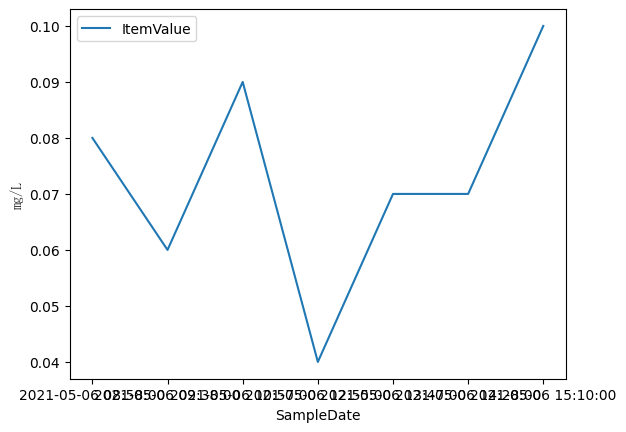

In [186]:
def simple_plot(df_src,x,y,title=None,xlabel=None,ylabel=None):
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')

    df_src.plot(x=x,y=y)
    plt.title(title,fontproperties=myfont)
    if xlabel:
        plt.xlabel(xlabel,fontproperties=myfont)
    if ylabel:
        plt.ylabel(ylabel,fontproperties=myfont)
    plt.show()

if 1:
    sql="""with t1 as(
select *,EXTRACT(MONTH FROM CAST ( "SampleDate" AS date )) as month,EXTRACT(YEAR FROM CAST ( "SampleDate" AS date )) as year from e_river_season_q where "Basin"='頭前溪流域' and "ItemName"='氨氮'
)
select distinct on ("SampleDate") * from t1 where year=2021 and month=5 order by "SampleDate";
    """
    df1 = sql_to_df(conn,sql) 
    df1=df1.sort_values(by=['SampleDate'])
    df1 = df1.astype({"ItemValue": float})
    df1=df1.sort_values(by=['SampleDate'])

    simple_plot(df1,x='SampleDate',y='ItemValue',xlabel=None,ylabel='mg/L')



# 數值分析

In [10]:
import numpy as np

df= pd.read_csv("~/Downloads/def.csv")

if 0:
    x=df['mean']
    y=df['water_usage']
    r = np.corrcoef(x, y)
df

,AreaCode,ReservoirIdentifier,ReservoirName,RiverName
0,基隆巿安樂區,10101,新山水庫,基隆河支流大武崙溪支流新山溪
1,基隆巿暖暖區,10201,西勢水庫,基隆河支流西勢溪
2,新北市新店區,10301,翡翠水庫,新店溪支流北勢溪
3,新北市新店區,10302,粗坑壩,淡水河支流新店溪
4,新北市新店區,10303,直潭壩,淡水河支流新店溪
...,...,...,...,...
90,連江縣南竿鄉,70302,儲水沃水庫,(天然積水)
91,連江縣南竿鄉,70303,津沙一號水庫,(天然積水)
92,連江縣南竿鄉,70304,津沙水庫,(天然積水)
93,連江縣南竿鄉,70305,勝利水庫,(天然積水)


# 山河事件簿相關

In [4]:
#station_city=['臺東縣','屏東縣']
#from datetime import date

def riverlog_rain_hourdiff_mon(limit):
    date_str= date.today()
    station_city=None
    time_now = datetime.now()
    time_set = get_2slot(time_now-timedelta(minutes = 80),1)
    #time_set=['2021-06-11 08:00:00','2021-06-11 09:00:00']
    rain_load(gd, date_str,0,True)
    ret = rain_hourdiff(gd,time_set,station_city)
    if ret:
        df = gd['rain-hourdiff']
        df_cal = df[df['rain_1hour']>=limit]
        overlimit_cnt  = len(df_cal.index)
    else:
        overlimit_cnt=0
    result = [time_set[1], overlimit_cnt]
    return result

if 0:
    result = riverlog_rain_hourdiff_mon(10)
    print(result)

In [3]:
df = gd['rain-rainData']
df

,stationID,time,now,timeGMT8,city,lat,lon,name,town,stationName
31992,12J990,2021-07-20T16:00:00.000Z,0.0,2021-07-21 00:00:00,雲林縣,23.5917,120.1723,口湖工作站,口湖鄉,雲林縣|口湖鄉|口湖工作站|12J990
32120,12Q970,2021-07-20T16:00:00.000Z,0.0,2021-07-21 00:00:00,屏東縣,22.4818,120.4580,東港工作站,東港鎮,屏東縣|東港鎮|東港工作站|12Q970
32248,12Q980,2021-07-20T16:00:00.000Z,0.0,2021-07-21 00:00:00,屏東縣,22.0815,120.7064,恆春工作站,車城鄉,屏東縣|車城鄉|恆春工作站|12Q980
34594,42HA10,2021-07-20T16:00:00.000Z,0.0,2021-07-21 00:00:00,南投縣,23.9806,121.1315,萬大發電廠,仁愛鄉,南投縣|仁愛鄉|萬大發電廠|42HA10
34723,466880,2021-07-20T16:00:00.000Z,0.0,2021-07-21 00:00:00,新北市,24.9994,121.4338,板橋,板橋區,新北市|板橋區|板橋|466880
...,...,...,...,...,...,...,...,...,...,...
255032,U2HA50,2021-07-21T13:30:00.000Z,0.0,2021-07-21 21:30:00,南投縣,23.7587,120.6734,臺大竹山,竹山鎮,南投縣|竹山鎮|臺大竹山|U2HA50
255104,V2C250,2021-07-21T13:30:00.000Z,25.0,2021-07-21 21:30:00,桃園市,24.9395,121.2582,八德合作社,八德區,桃園市|八德區|八德合作社|V2C250
255360,V2C260,2021-07-21T13:30:00.000Z,14.5,2021-07-21 21:30:00,桃園市,24.9803,121.2736,八德蔬果,八德區,桃園市|八德區|八德蔬果|V2C260
255616,V2K610,2021-07-21T13:30:00.000Z,0.0,2021-07-21 21:30:00,雲林縣,23.8086,120.3598,大庄合作社,二崙鄉,雲林縣|二崙鄉|大庄合作社|V2K610


# Grafana 連結

In [ ]:
import time
import random

case_id="riverlog_rain_hourdiff_station_cnt"
period=60 # second
conn=connect_db()
while True:
    t_value = time.time()
    v=random.randint(0,99)
    sqls=[]
    if case_id=="test":
        sql="INSERT INTO t_time_series VALUES (%i,'test1', %i);" %(t_value,v)
        period=1
    if case_id=="pm25":
        url="https://pm25.lass-net.org/data/last.php?device_id=74DA38B053E4"
        filename="output/pm25_last.json"
        url_get(filename, url,True)
        data = load_json(filename)
        pm25=data['feeds'][0]['AirBox']['s_d0']
        sql="INSERT INTO t_time_series VALUES (%i,'pm25_74DA38B053E4', %.2f);" %(t_value,pm25)
        period=300
    if case_id=="riverlog_rain_hourdiff_station_cnt":
        result = riverlog_rain_hourdiff_mon(gd,40)
        print("riverlog_rain_hourdiff_station_cnt=%s" %(result))
        date_obj = datetime.strptime(result[0], "%Y-%m-%d %H:%M:%S")
        t_value = date_obj.timestamp()
        sqls.append("delete from t_time_series where dt=%i" %(t_value))
        sqls.append("INSERT INTO t_time_series VALUES (%i,'%s', %.2f);" %(t_value,case_id,result[1]))
        period=10*60
    
    if len(sqls)>0:
        for sql in sqls:
            print(sql)
            sql_exec(conn,sql)
    else:
        print(sql)
        sql_exec(conn,sql)

    time.sleep(period)

# 情境 - A1
里到取水口

給個里

. desc(里)
.. [TODO]面積，人口，基本資料
.. 列出淨水場與取水口為何
. desc(淨水場)
.. 淨水場 GPS
.. 最新這期水質
.. 最近這期水量
. desc(取水口)
.. 取水口 GPS
.. 最近水量
.. 最近水質


In [118]:
def str_tran(line):
    ret = []
    g = re.match( r'(\d*).(\d*).(\d*)', line, re.M|re.I)

    if g:
        year = int(g.group(1))
        month = int(g.group(2))
        day=int(g.group(3))
        return [year,month,day]
    return ret

def datestr_to_month_between(date_str,delimiter="-"):
    fmt = "%%Y%s%%m%s%%d" % (delimiter,delimiter)
    date_obj = datetime.strptime(date_str, fmt)
    year=date_obj.year
    month = date_obj.month + 1
    if month>12:
        month=1
        year+=1
    fmt = "%%i%s%%02i%s01" % (delimiter,delimiter)
    return "%s" % date_obj.strftime("%Y-%m-01") , fmt %(year,month)

class Record():
    def __init__(self):
        self.mdf = None
        self.odf={} #key->df
        self.ddf = None
        self.debug=False
    def init(self,conn,sql):
        if self.debug:
            print("sql=%s" % (sql))
        self.mdf = sql_to_df(conn,sql)
    def init_d(self,conn,sql):
        if self.debug:
            print("sql=%s" % (sql))
        self.ddf = sql_to_df(conn,sql)
    def load_info(self,key,sql):
        if self.debug:
            print("sql=%s" % (sql))
        df = sql_to_df(conn,sql)
        if not df is None:
            self.odf[key]=df
        else:
            self.odf[key]=None
    def mget(self,col_id):
        col_s = self.mdf[col_id]
        if len(col_s.index)>0:
            return col_s.tolist()[0]
        else:
            return None
    def mdesc(self):
        if not self.mdf is None:
            print("Master record:\n%s " %(self.mdf))
        if not self.ddf is None:
            if len(self.ddf.index)>0:
                print("Detail record:\n%s " %(self.ddf))

        for key in self.odf.keys():
            print("\nOther record: %s" %(key))
            if not self.odf[key] is None:
                print(self.odf[key])

class ValueDomain():
    def __init__(self):
        self.df = None
        self.pos={}
        self.rev={}
    def load(self,conn):
        sql = "select * from s_value_domain"
        self.df = sql_to_df(conn,sql)
        for index, row in self.df.iterrows():
            key = "%s|%s|%s" %( row['a_domain'],row['b_domain'],row['a_value'])
            self.pos[key]=row['b_value']
            key = "%s|%s|%s" %( row['b_domain'],row['a_domain'],row['b_value'])
            self.rev[key]=row['a_value']
    def map(self,a_domain,b_domain,value_src,b_pos=True):
        value = value_src
        if b_pos:
            key = "%s|%s|%s" % (a_domain,b_domain,value_src)
            if key in self.pos:
                value = self.pos[key]
        else:
            key = "%s|%s|%s" % (b_domain,a_domain,value_src)
            if key in self.rev:
                value = self.rev[key]
        return value
        
        
#init
vd=ValueDomain()
vd.load(conn)

#input 
vil = "水源里"
sql_t="select * from s_village_waterin where \"VILLNAME\"='%s';" 
sql = sql_t % (vil)

vw=Record()
vw.init(conn,sql)
waterwork_str=vw.mget('WATERWORK')
waterin_str=vw.mget('WATERIN')


sql_t="select * from s_info_point where name='%s'"
sql = sql_t %(vd.map('s_village_waterin.WATERWORK','s_info',waterwork_str))
vw.load_info('waterwork',sql)

waterin_str2=vd.map('s_village_waterin.WATERIN','s_info',waterin_str)
sql_t="select * from s_info_point where name='%s'"

sql = sql_t %(waterin_str2)
vw.load_info('waterin',sql)

print("----- 里到取水口 資訊以及基本資料 ")
vw.mdesc()

#淨水場位置
sql="select * from m_waterwork_area where \"淨水場名稱\"='%s' and \"區處別\"=3" %(waterwork_str)
df = sql_to_df(conn,sql)
print("----- 淨水場位置 ")
print(df)
#淨水場供水量
print("----- 淨水場供水量 ")
sql_t="select * from s_waterwork_qty where waterwork='%s'"
#waterwork_str="寶山淨水廠"
sql = sql_t %(waterwork_str)

waterwork=Record()
waterwork.init_d(conn,sql)
waterwork.mdesc()
if len(waterwork.ddf.index)==0:
    print("%s 沒有供水量資料" %(waterwork_str))
else:
    #顯示最新一個月的供水量
    # get max_date

    sql_t="select max(date) as date from s_waterwork_qty where waterwork='%s'"
    sql= sql_t %(waterwork_str)
    df = sql_to_df(conn,sql)
    date_obj=df['date'].to_list()[0]
    date_str=date_obj.strftime("%Y-%m-%d")
    print(date_str)
    date_s,date_e = datestr_to_month_between(date_str)

    # sql
    sql="select * from s_waterwork_qty where waterwork='%s' and date >='%s' and date < '%s' order by date" %(waterwork_str,date_s,date_e)
    #print(sql)
    df = sql_to_df(conn,sql)
    print("%s 最新的月供水量資料: 單位（噸）" % (waterwork_str))
    print(df)

#淨水場水質
#顯示最新一個月的水質（環保署）
print("----- 淨水場水質 ")
# get max_date 110.01.05
sql="select max(\"CKDATE\") as date from e_waterwork_q"
df = sql_to_df(conn,sql)
date_str=df['date'].to_list()[0]
year,month,day = str_tran(date_str)

date_s = "%i.%02i.01" %(year,month)
month+=1
if month>12:
    month=1
    year+=1
#date_str = "%i.%02i.%02i" % (year,month,day)
#print(datestr_to_month_between(date_str,"."))
date_e = "%i.%02i.01" %(year,month)
waterwork_str2 = vd.map('s_village_waterin.WATERWORK','e_waterwork_q',waterwork_str) #'新竹給水廠新竹第二淨水場'

sql_t = "select \"ITEM\",CAST(\"CKDATE\" as date),\"ITEMVAL\" from e_waterwork_q where \"PLANT\"='%s' and \"CKDATE\">= '%s' and \"CKDATE\"< '%s' order by \"CKDATE\""
sql = sql_t % (waterwork_str2,date_s,date_e)
#print(sql)
df = sql_to_df(conn,sql)
print("%s 最新的月水質資料:" % (waterwork_str2))
print(df)
#取水口位置
sql="select ST_AsText(ST_Transform(geom,4326)) as wkt from s_waterin_b where name='%s';" %(waterin_str) #頭前溪(隆恩堰）
df = sql_to_df(conn,sql)
print("----- 取水口位置 %s " %(waterin_str))
print(df)

#取水口取水量 s_waterin_qty
print("----- 取水口取水量 ")
sql="select max(date) as date from s_waterin_qty where waterin='%s'" %(waterin_str2) #0110年5月1日
df = sql_to_df(conn,sql)
date_obj=df['date'].to_list()[0]
date_str=date_obj.strftime("%Y-%m-%d")
date_s,date_e = datestr_to_month_between(date_str)
sql="select * from s_waterin_qty where waterin='%s' and date >='%s' and date < '%s'" %(waterin_str2,date_s,date_e)
df = sql_to_df(conn,sql)
print("%s 最新的取水量資料:" % (waterin))
print(df)

#取水口水質
print("----- 取水口水質 ")
sql="select max(date) as date from s_waterin_quality"
df = sql_to_df(conn,sql)
date_obj=df['date'].to_list()[0]
date_str=date_obj.strftime("%Y-%m-%d")
date_s,date_e = datestr_to_month_between(date_str)

sql="select * from s_waterin_quality where waterwork='%s' and date >='%s' and date < '%s'" %(waterwork_str,date_s,date_e)
#print(sql)
df = sql_to_df(conn,sql)
print("%s 最新的月水質資料:" % (waterwork_str))
print(df)







----- 里到取水口 資訊以及基本資料 
Master record:
      VILLCODE COUNTYNAME TOWNNAME VILLNAME        VILLENG COUNTYID  \
0  10018010039        新竹市       東區      水源里  Shuiyuan Vil.        O   

   COUNTYCODE TOWNID    TOWNCODE  NOTE WATERWORK   WATERIN  
0     10018.0    O01  10018010.0  None     第二淨水場  頭前溪(隆恩堰）   

Other record: waterwork
   geo_type   geo                                    id     name catagory  \
0       1.0  None  64516083-1319-4f8b-a68f-83e04c286257  新竹第二淨水場      淨水場   

    desc src_id json_def  urls  
0  位於博愛街   None     None  None  

Other record: waterin
   geo_type   geo                                    id name catagory  \
0       1.0  None  45592f5e-7e9f-487a-ae21-3e0efef18d69  隆恩堰      取水口   

                                                desc  src_id json_def  \
0  隆恩堰位於新竹縣頭前溪中游經國橋上游約1公里之竹東鎮與竹北市交界處，由原新竹水利會隆恩取水口...     0.0     None   

                                                urls  
0  隆恩堰|https://www.wranb.gov.tw/3452/3475/26113/%...  
----- 淨水場位置 
   區處別  淨水場

# 情境 - B1
民眾->生活污水處理廠->河川

In [ ]:
# 26815-污水下水道用戶接管普及率
url="http://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=AD65A7EB-20F7-4C30-84D4-F4528C2FF72F"
filename="output/pm25_last.json"
url_get(filename, url,True)

# flwdir

## 相關基礎測試 geopandas, shapely,rasterio

In [48]:
#geopandas test
if 0:
    import geopandas
    sql="select * from basin"
    gdf = geopandas.read_postgis(sql,conn)
    gdf['area_my'] = gdf.area
    #gdf.geom_type

def y(a,x):
    return a*x

if 0:
    feats=[]

    for i in range(20):
        props = {}
        feats.append(
            {
                "type": "Feature",
                "properties": {"index": i,"par1":5,  **props},
                "geometry": {
                    "type": "LineString",
                    "coordinates": [(j, y(i,j)) for j in range(10)],
                },

            }
        )
    gdf = gpd.GeoDataFrame.from_features(feats, fd.crs)
    gdf

,geometry,index,par1
0,"LINESTRING (0.00000 0.00000, 1.00000 0.00000, ...",0,5
1,"LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...",1,5
2,"LINESTRING (0.00000 0.00000, 1.00000 2.00000, ...",2,5
3,"LINESTRING (0.00000 0.00000, 1.00000 3.00000, ...",3,5
4,"LINESTRING (0.00000 0.00000, 1.00000 4.00000, ...",4,5
5,"LINESTRING (0.00000 0.00000, 1.00000 5.00000, ...",5,5
6,"LINESTRING (0.00000 0.00000, 1.00000 6.00000, ...",6,5
7,"LINESTRING (0.00000 0.00000, 1.00000 7.00000, ...",7,5
8,"LINESTRING (0.00000 0.00000, 1.00000 8.00000, ...",8,5
9,"LINESTRING (0.00000 0.00000, 1.00000 9.00000, ...",9,5


## shapely 測試

In [45]:
if 0: # 線段中平均取幾點
    ip = LineString([(0, 0), (0, 1), (1, 1),(1,4)])
    for i in range(11):
        print(ip.interpolate(float(i)/10,normalized=True).wkt)
    point = Point(0.0, 0.5)
    print(ip.project(point))

if 0: #merge line
    ip1 = LineString([(0, 0), (0, 1)])
    ip2 = LineString([(0, 1), (1, 1)])
    print(ip2)
    from shapely.geometry import MultiLineString
    #coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
    coords = [ip1.coords.xy,ip2.coords.xy]
    print(coords)
    lines = MultiLineString(coords)
    print(ip)
    #LineString([(0, 0), (0, 1), (1, 1)]).project(ip)
if 1: # divid to few substring and join
    from shapely.ops import *
    from numpy import array
    line = LineString(([0, 0], [2, 0]))
    lines = []
    for i in range(10):
        s = i/10.0
        e = (i+1)/10.0
        #print("s=%s,e=%s" %(s,e))
        line1 = substring(line,s , e,normalized=True)
        #print(array(line1))
        xys=[]
        for xy in array(line1):
            xys.append(xy)
        lines.append(xys)
    print(lines)
    mlines = MultiLineString(lines)

[[array([0., 0.]), array([0.2, 0. ])], [array([0.2, 0. ]), array([0.4, 0. ])], [array([0.4, 0. ]), array([0.6, 0. ])], [array([0.6, 0. ]), array([0.8, 0. ])], [array([0.8, 0. ]), array([1., 0.])], [array([1., 0.]), array([1.2, 0. ])], [array([1.2, 0. ]), array([1.4, 0. ])], [array([1.4, 0. ]), array([1.6, 0. ])], [array([1.6, 0. ]), array([1.8, 0. ])], [array([1.8, 0. ]), array([2., 0.])]]


In [50]:
fd.gdf_paths

,index,geometry,idxs,pit,group
0,0,"LINESTRING (260999.943 2735863.874, 260999.943...",1747244,False,1
1,1,"LINESTRING (253519.085 2743364.734, 253499.083...",929370,False,1
2,2,"LINESTRING (247778.427 2746445.087, 247758.424...",593363,False,1


## rasterio

In [6]:
import rasterio
filename = "data/catchment/C1300_20m_elv0.tif"
with rasterio.open(filename, 'r') as rio:
    data = rio.read(1)
    #transform = src1.transform
    #self.crs = src1.crs
    #self.latlon = self.crs.to_epsg() == 4326
    #print("%s info:%s" %(flwdir_file,src1))
    #rio.meta
if 1:
    points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口'],[274202,2731387,'點A']]

    for i in range(len(points)):    
        point = points[i]
        row,col =rio.index(point[0],point[1])
        print("%s height:%.2f" %(point[2],data[row,col]))

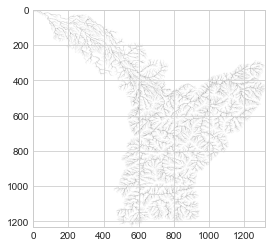

In [42]:
%matplotlib inline

import rasterio
hackathon="/Users/wuulong/MakerBk2/QGIS/projects/hackathon"
filename = "%s/觀察主題/water_index/water_index.tif" %(hackathon)
with rasterio.open(filename, 'r') as rio:
    data = rio.read(1)
plt.imshow(data)

# 帶起各種 flwdir 功能

In [87]:

from codes.flwdir import *
from shapely.geometry import *
import geopandas as gpd


    
fd = FlwDir()
fd.reload()
fd.init()
if 0: # filename rule: None: return json, '' use default filename
    fd.streams(9,'')
    fd.desc_stream()
if 1:
    #points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口']]
    #points=[[260993,2735861,'油羅上坪匯流']]
    points=[[265751,2715857,'S1']]
    #points=[[272866,2736115,'油羅A']]
    #bas_gdf = fd.basins(points,'')
    fd.path(points,'')
    #a=bas_gdf[1].iloc[1]['geometry']
    #b=bas_gdf[0].iloc[1]['geometry']
    #fd.diff_basins(a,b)

if 0:
    for i in range(7,11):
        fd.subbasins_streamorder(i,'')
if 0:
    wkt_str="MultiLineString ((255779.34444821099168621 2742184.59869130607694387, 255062.52472444207523949 2741882.12604631343856454, 254328.86074706495855935 2742279.99766481388360262))"
    fd.join_line(wkt_str) #modify gdf

if 0:
    points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口']]
    fd.basins(points,'')

    bas_df = fd.gdf_bas

    for index, row in bas_df.iterrows():
        if row['name']=='隆恩堰' and row['value']==1:

            a = row['geometry']
        if row['name']=='油羅上坪匯流' and row['value']==1:
            b = row['geometry']
    c=a.difference(b)

    gs = gpd.GeoSeries([c],crs=fd.crs)
    gs.to_file('output/basin_diff_2point.geojson', driver='GeoJSON')

if 0: #河道拓墣查鄉鎮，或是河川名稱
    level=10 # <10 用 sql 查，10 是查河川代碼 API
    if level==1:
        sql_t="""select townname from town_moi where ST_Intersects('SRID=3826;POINT(%s %s)'::geometry,ST_Transform(ST_SetSRID(bbox,3824),3826))"""
    else:
        sql_t="""select townname,villname from village_moi_121 where ST_Intersects('SRID=3826;POINT(%s %s)'::geometry,ST_SetSRID(geom,3826))"""
    fd.streams(9,'')
    [coords,link]=fd.desc_stream()   
    townnames={}
    for l, row in fd.gdf.iterrows():
        line = row['geometry']    
        points = list(line.coords)
        start = points[0]
        end = points[len(points)-1]
        mid = line.interpolate(0.5,normalized=True)
        print("POINTS: index=%i,start=%s,end=%s,mid=%s" %(l,start,end,mid))
#    for l in link:
#        start=coords[l][0]
#        end=coords[l][1]
#        mid=Point((start[0]+end[0])/2,(start[1]+end[1])/2)
        #print("N%i->N%i, start=%s,end=%s,mid=%s" %(l,link[l],start,end,mid))
        if level<10:
            sql=sql_t %(mid.x,mid.y)
            print("sql=%s" %(sql))
            df = sql_to_df(conn,sql)
            townname=''
            if len(df.index)>0:
                if level==1:
                    townname=df['townname'].to_list()[0]
                else:
                    town_name=df['townname'].to_list()[0]
                    villname=df['villname'].to_list()[0]
                    townname = "%s-%s" %(town_name,villname)
        else:
            pos=st_transform(3826,4326,[mid.x,mid.y])
            data = rivercode_search(pos)
            if data is None:
                townname = '%s' %(pos)
                
            else:
                townname = data['river']['name']
        townnames[l]=townname
        print("N%i(%s)->N%i" %(l,townname,link[l]))
    
    for l in link:
        if not l == link[l]:
            if link[l] in townnames.keys():
                print("\"N%i(%s)\"->\"N%i(%s)\"" %(l,townnames[l],link[l],townnames[link[l]]))
            else:
                print("\"N%i(%s)\"->\"N%i\"" %(l,townnames[l],link[l]))
        
if 0:
    import networkx as nx
    #import matplotlib.pyplot as plt
    fd.streams(9,'')  
    G = nx.DiGraph()
    nodes = {}
    for index, row in fd.gdf.iterrows():
        line = row['geometry']
        points = list(line.coords)
        start = points[0]
        end = points[len(points)-1]
        line_len = line.length
        seg_cnt = len(line.coords)
        if not start in nodes.keys():
            nodes[start]=1
            wkt = "POINT (%s %s)" %(start[0],start[1])
            sname = "S%s" %(index)
            G.add_node(start,name=sname,Wkt=wkt)
        if not end in nodes.keys():
            nodes[end]=1
            wkt = "POINT (%s %s)" %(end[0],end[1])
            ename = "E%s" %(index)
            G.add_node(end,name=ename,Wkt=wkt)
        G.add_weighted_edges_from([(start, end,line_len)],edge_id=index,edge_name=index)
    json = nx.node_link_data(G)
    print(json)
    nx.write_shp(G,"output/stream")
    if fd.crs.to_epsg() == 3826:
        prj="""PROJCS["TWD_1997_TM_Taiwan",GEOGCS["GCS_TWD_1997",DATUM["D_TWD_1997",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",250000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",121.0],PARAMETER["Scale_Factor",0.9999],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]"""
        with open("output/stream/nodes.prj",'w') as f:
            f.write(prj)
        with open("output/stream/edges.prj","w") as f:
            f.write(prj)
if 0: #單點到 stream 資訊: 距離，最近點，哪一個線段
    fd.streams(9,'')
    result = fd.point_with_streams([253520,2743364])
    print(result)




data/catchment/C1300_20m_elv0.tif info:<open DatasetReader name='data/catchment/C1300_20m_elv0.tif' mode='r'>
data/catchment/C1300_20m_LDD.tif info:<open DatasetReader name='data/catchment/C1300_20m_LDD.tif' mode='r'>
{'ftype': 'ldd',
 'idxs_ds': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 'idxs_pit': array([ 540653, 1909678, 2635460, 3276180, 4662033, 4779528], dtype=int32),
 'idxs_seq': None,
 'latlon': False,
 'ncells': 2199615,
 'shape': (2197, 2180),
 'transform': Affine(20.00229477064219, 0.0, 239707.5006,
       0.0, -20.00229476558928, 2751895.7128)}
path saved:output/river_c1300_path.geojson


In [76]:
#line 內差點會與高程, 計算線段 slope 並輸出, 回傳 csv dict
from shapely import geometry, ops
def pathline_slope(name,line,csv,feats,output,rio,elevtn,filename_csv='output/path_height.csv', \
                   filename_shp="output/pathline_slope.shp",parts=10): #輸出 內差點為的 csv, 有高程屬性的 shp
    #gdf 多線段合成一線段的方法
    #fd.gdf_paths['group']=1
    #gdf = fd.gdf_paths.dissolve(by='group')
    slope_max =100000
    #data = rio.read(1)
    #csv={'name':[],'index':[],'pos':[],'x':[],'y':[],'height':[]}
    #line = row['geometry']
    #multilinestring 合成linestring 的方法
    #line = ops.linemerge(multi_line)
    print("line interpolate with %i part:\npos,x,y,height" %(parts))
    #feats=[]
    for i in range(parts+1): #產生 features
        interp = float(i)/parts
        point = line.interpolate(interp,normalized=True)
        row,col =rio.index(point.x,point.y)
        height = elevtn[row,col]
        print("%s,%i,%.3f,%.3f,%.3f,%.3f" %(name,i, interp*line.length, point.x,point.y,height))
        csv['name'].append(name)
        csv['index'].append(i)
        csv['pos'].append(interp*line.length)
        csv['x'].append(point.x)
        csv['y'].append(point.y)
        csv['height'].append(height)
        #print("%s height:%.2f" %(point[2],data[row,col]))
        if i>0:
            e = float(i)/parts
            s = float((i-1))/parts
            #print("s=%s,e=%s" %(s,e))
            line1 = substring(line,s , e,normalized=True)
            points = list(line1.coords)
            if height_prev != height:
                slope = line.length / (height_prev - height)
                avg_height = (height_prev + height) / 2
            else:
                slope = slope_max
                avg_height= height
            props = {}
            feats.append(
                {
                    "type": "Feature",
                    "properties": {"name":name,"index": i,"slope":slope, "avg_height":avg_height ,  **props},
                    "geometry": {
                        "type": "LineString",
                        "coordinates": [(p[0], p[1]) for p in points],
                    },

                }
            )
        point_prev = point
        height_prev = height
    
    #產生 gdf
    gdf_lines = gpd.GeoDataFrame.from_features(feats, fd.crs)

    if output==1: #CSV output
        #csv
        df = pd.DataFrame.from_dict(csv)
        df.to_csv(filename_csv)
        print("pathline_interpolate saved: %s" %(filename_csv))

        #gdf
        dict_par={'encoding':'utf-8'}
        gdf_lines.to_file(filename_shp,**dict_par)
        print("pathline slope saved: %s" %(filename_shp))
    return gdf

gdf=fd.gdf_paths
csv={'name':[],'index':[],'pos':[],'x':[],'y':[],'height':[]}
feats=[]

for index, row in gdf.iterrows():
    line = row['geometry']
    name = row['name']
    if 0:# don't merge
        csv={'name':[],'index':[],'pos':[],'x':[],'y':[],'height':[]}
        feats=[]
        pathline_slope(name,line,csv,feats,1,fd.rio1,fd.elevtn,parts=20, \
                       filename_csv='output/path_height_%i.csv' %(index),filename_shp="output/pathline_slope_%i.shp" %(index))
    else:
        if index==len(fd.gdf_paths.index)-1:
            output=1
            filename_csv='output/path_height.csv'
            filename_shp="output/pathline_slope.shp" 
        else:
            output=0
            filename_csv='output/path_height_%i.csv' %(index)
            filename_shp="output/pathline_slope_%i.shp" %(index)
        pathline_slope(name,line,csv,feats,output,fd.rio1,fd.elevtn,parts=20, \
                       filename_csv=filename_csv,filename_shp=filename_shp)
        

line interpolate with 20 part:
pos,x,y,height
油羅上坪匯流,0,0.000,260999.943,2735863.874,118.083
油羅上坪匯流,1,1650.139,259999.829,2736803.981,108.621
油羅上坪匯流,2,3300.278,259159.732,2737984.117,94.682
油羅上坪匯流,3,4950.416,257836.149,2738647.624,84.278
油羅上坪匯流,4,6600.555,257250.224,2739953.632,75.186
油羅上坪匯流,5,8250.694,256239.397,2741109.917,65.067
油羅上坪匯流,6,9900.833,255495.880,2742224.603,47.880
油羅上坪匯流,7,11550.972,254379.184,2743144.709,44.226
油羅上坪匯流,8,13201.110,252985.887,2743644.766,33.802
油羅上坪匯流,9,14851.249,251809.183,2744474.567,27.631
油羅上坪匯流,10,16501.388,250657.924,2745525.815,17.256
油羅上坪匯流,11,18151.527,249436.779,2746186.896,9.344
油羅上坪匯流,12,19801.666,247946.730,2746425.085,5.690
油羅上坪匯流,13,21451.804,246545.148,2746985.149,2.695
油羅上坪匯流,14,23101.943,245212.691,2747610.663,1.413
油羅上坪匯流,15,24752.082,243916.978,2748466.324,1.124
油羅上坪匯流,16,26402.221,242782.117,2749625.452,0.169
油羅上坪匯流,17,28052.360,241750.456,2750218.241,0.000
油羅上坪匯流,18,29702.499,241085.527,2749597.581,0.010
油羅上坪匯流,19,31352.637,240784.903

In [89]:
#line 內差點並取得流量資料, 計算線段平均流量與流量變化並輸出, 回傳 csv dict
#1003
from shapely import geometry, ops
def pathline_flow(name,line,csv,feats,output,wf,filename_csv='output/pathline_flow.csv', \
                   filename_shp="output/pathline_flow.shp",parts=10): #輸出 內差點為的 csv, 有高程屬性的 shp
    print("line interpolate with %i part:\npos,x,y,flow" %(parts))
    #feats=[]
    avg_flow_prev = None
    for i in range(parts+1): #產生 features
        interp = float(i)/parts
        point = line.interpolate(interp,normalized=True)
        #取得流量
        
        #row,col =rio.index(point.x,point.y)
        #height = elevtn[row,col]
        #flow=0.5
        lonlat=to_crs([point.x,point.y], 3826,4326)
        flow = wf.get_flow("max_offset",[lonlat[0],lonlat[1],10],False)
        print("%s,%i,%.3f,%.3f,%.3f,%.3f" %(name,i, interp*line.length, lonlat[0],lonlat[1],flow))
        csv['name'].append(name)
        csv['index'].append(i)
        csv['pos'].append(interp*line.length)
        csv['x'].append(point.x)
        csv['y'].append(point.y)
        csv['flow'].append(flow)
        #print("%s height:%.2f" %(point[2],data[row,col]))
        if i>0:
            e = float(i)/parts
            s = float((i-1))/parts
            #print("s=%s,e=%s" %(s,e))
            line1 = substring(line,s , e,normalized=True)
            points = list(line1.coords)
            avg_flow = (flow_prev+flow) /2
            if avg_flow_prev:
                avg_flow_diff = avg_flow - avg_flow_prev
            else:
                avg_flow_diff = 0
            #if height_prev != height:
            #    slope = line.length / (height_prev - height)
            #    avg_height = (height_prev + height) / 2
            #else:
            #    slope = slope_max
            #    avg_height= height
            props = {}
            feats.append(
                {
                    "type": "Feature",
                    "properties": {"name": "%s_%i" %(name,i),"index": i,"flow_diff":avg_flow_diff, "avg_flow":avg_flow ,  **props},
                    "geometry": {
                        "type": "LineString",
                        "coordinates": [(p[0], p[1]) for p in points],
                    },

                }
            )
            avg_flow_prev = avg_flow
        point_prev = point
        flow_prev = flow
        
    
    #產生 gdf
    gdf_lines = gpd.GeoDataFrame.from_features(feats, fd.crs)

    if output==1: #CSV output
        #csv
        df = pd.DataFrame.from_dict(csv)
        df.to_csv(filename_csv)
        print("pathline_flow saved: %s" %(filename_csv))

        #gdf
        dict_par={'encoding':'utf-8'}
        gdf_lines.to_file(filename_shp,**dict_par)
        print("pathline_flow saved: %s" %(filename_shp))
    return gdf

gdf=fd.gdf_paths
csv={'name':[],'index':[],'pos':[],'x':[],'y':[],'flow':[]}
feats=[]

for index, row in gdf.iterrows():
    line = row['geometry']
    name = row['name']
    if 0:# don't merge
        csv={'name':[],'index':[],'pos':[],'x':[],'y':[],'flow':[]}
        feats=[]
        pathline_flow(name,line,csv,feats,1,wf,parts=20, \
                       filename_csv='output/path_flow_%i.csv' %(index),filename_shp="output/pathline_flow_%i.shp" %(index))
    else:
        if index==len(fd.gdf_paths.index)-1:
            output=1
            filename_csv='output/pathline_flow.csv'
            filename_shp="output/pathline_flow.shp" 
        else:
            output=0
            filename_csv='output/pathline_flow_%i.csv' %(index)
            filename_shp="output/pathline_flow_%i.shp" %(index)
        pathline_flow(name,line,csv,feats,output,wf,parts=20, \
                       filename_csv=filename_csv,filename_shp=filename_shp)

line interpolate with 20 part:
pos,x,y,flow
S1,0,0.000,121.156,24.549,181.602
S1,1,3510.638,121.124,24.548,308.898
S1,2,7021.275,121.108,24.559,464.617
S1,3,10531.913,121.105,24.576,546.906
S1,4,14042.551,121.112,24.597,592.984
S1,5,17553.189,121.106,24.616,912.719
S1,6,21063.826,121.121,24.629,960.781
S1,7,24574.464,121.129,24.651,1076.024
S1,8,28085.102,121.109,24.668,1129.000
S1,9,31595.740,121.104,24.688,1165.992
S1,10,35106.377,121.104,24.714,1163.211
S1,11,38617.015,121.100,24.737,2167.242
S1,12,42127.653,121.078,24.755,2230.172
S1,13,45638.291,121.061,24.778,2233.922
S1,14,49148.928,121.040,24.796,2241.586
S1,15,52659.566,121.014,24.811,2237.352
S1,16,56170.204,120.987,24.824,2237.852
S1,17,59680.842,120.958,24.835,2240.531
S1,18,63191.479,120.932,24.852,0.000
S1,19,66702.117,120.914,24.853,0.000
S1,20,70212.755,120.901,24.830,0.000
pathline_flow saved: output/pathline_flow.csv
pathline_flow saved: output/pathline_flow.shp


In [12]:
len(fd.gdf_paths.index)

3

# 站點到 stream 的距離

In [ ]:
#頭前溪流域內的水質測站
#sql="select * from basin where basin_name='頭前溪'"
sql="select * from basin"
gdf1 = geopandas.read_postgis(sql,conn)

sql="select * from e_river_station"
gdf2 = geopandas.read_postgis(sql,conn)
gdf2=gdf2.set_crs('epsg:3826')

from geopandas.tools import sjoin
gdf4 = sjoin(gdf2, gdf1, how='left')
gdf4[gdf4['basin_name']=='頭前溪'][['sitename','basin','basin_name']]


In [74]:
#站點到 stream 的距離
from codes.flwdir import *
from shapely.geometry import *
import geopandas as gpd
from shapely.ops import nearest_points

#sql="select * from riverpoly_rivercode where river_name='頭前溪'"
#gdf1 = geopandas.read_postgis(sql,conn)
sql="select * from e_river_station where basin='頭前溪流域'"
gdf2 = gpd.read_postgis(sql,conn)
gdf2=gdf2.set_crs('epsg:3826')
#gdf2.distance(gdf1)
#gdf2
fd = FlwDir()
fd.reload()
fd.init()
fd.streams(9,'')

points=[]
for index, row in gdf2.iterrows():
    start = row['geom']
    
    dist_min=5000
    idx_min=None
    for index2, row2 in fd.gdf.iterrows():
        line = row2['geometry']
        dist = line.distance(start)
        if dist<dist_min:
            dist_min=dist
            idx_min=index2
    print("index=%i, minimal distance=%f" %(idx_min,dist_min))
    line_ori = fd.gdf.loc[idx_min]['geometry']
    
    pt_in = nearest_points(line_ori, start)[0]
    #print(pt_in.coords[0][0])
    xy=pt_in.coords[0]
    point = [xy[0],xy[1],row['sitename']]
    points.append(point)

#print(points)
for p in points:
    print("%s,%s,%s" %(p[0],p[1],p[2]))

for p in points:
    pn = st_transform(3826,4326,[p[0],p[1]])
    print("%s,%s,%s" %(pn[0],pn[1],p[2]))


#points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口']]
fd.basins(points,'')
fd.gdf_bas

data/C1300_20m_LDD.tif info:<open DatasetReader name='data/C1300_20m_LDD.tif' mode='r'>
data/C1300_20m_elv0.tif info:<open DatasetReader name='data/C1300_20m_elv0.tif' mode='r'>
{'ftype': 'ldd',
 'idxs_ds': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 'idxs_pit': array([ 540653, 1909678, 2635460, 3276180, 4662033, 4779528], dtype=int32),
 'idxs_seq': None,
 'latlon': False,
 'ncells': 2199615,
 'shape': (2197, 2180),
 'transform': Affine(20.00229477064219, 0.0, 239707.5006,
       0.0, -20.00229476558928, 2751895.7128)}
stream saved filename=output/river_c1300_stream_9.geojson
index=11, minimal distance=53.635034
index=8, minimal distance=41.661308
index=3, minimal distance=110.111898
index=9, minimal distance=86.832346
index=16, minimal distance=0.370287
index=3, minimal distance=52.252523
index=16, minimal distance=43.729939
index=3, minimal distance=47.991985
255879.3559220642,2742044.582627947,中正大橋
268560.81080665137,2732823.5247410103,內灣吊橋
260559.89289839446,2735065.0556000

,geometry,name,value
0,"POLYGON ((262810.151 2743874.793, 262810.151 2...",中正大橋,2.0
1,"POLYGON ((279552.072 2739814.327, 279552.072 2...",內灣吊橋,2.0
2,"POLYGON ((260489.885 2735093.785, 260489.885 2...",竹東大橋,2.0
3,"POLYGON ((279432.058 2741774.552, 279432.058 2...",竹林大橋,2.0
4,"POLYGON ((248448.503 2746795.128, 248448.503 2...",湳雅取水口(取代溪洲大橋),2.0
5,"POLYGON ((262590.126 2730893.303, 262590.126 2...",瑞昌大橋(原為瑞豐大橋),2.0
6,"POLYGON ((249768.655 2746395.082, 249768.655 2...",頭前溪橋,2.0
7,"POLYGON ((260209.853 2731593.384, 260209.853 2...",寶山水庫取水口,2.0


# flwdir+networkx

In [ ]:
from codes.flwdir import *
from shapely.geometry import *
import geopandas as gpd
import json
    

def stream_gen_networkx(stream_gdf,shp=0): #shp(1): point for shp, shp(0): id base
    import networkx as nx
    #import matplotlib.pyplot as plt
    #fd.streams(9,'')  
    G = nx.DiGraph()
    nodes = {}
    for index, row in stream_gdf.iterrows():
        line = row['geometry']
        points = list(line.coords)
        start = points[0]
        end = points[len(points)-1]
        line_len = line.length
        seg_cnt = len(line.coords)
        
        
        if not start in nodes.keys():
            
            wkt = "POINT (%s %s)" %(start[0],start[1])
            sname = "S%s" %(index)
            nodes[start]=sname
            if shp==1:
                G.add_node(start,name=sname,Wkt=wkt)
            else:
                G.add_node(sname,name=sname,Wkt=wkt)
        else:
            sname = nodes[start]
        if not end in nodes.keys():
            
            wkt = "POINT (%s %s)" %(end[0],end[1])
            ename = "E%s" %(index)
            nodes[end]=ename
            if shp==1:
                G.add_node(end,name=ename,Wkt=wkt)
            else:
                G.add_node(ename,name=ename,Wkt=wkt)
        else:
            ename = nodes[end]

        if shp==1:
            G.add_weighted_edges_from([(start, end,line_len)],edge_id=index,edge_name=index,length=line_len,line=line)
        else:
            G.add_weighted_edges_from([(sname, ename,line_len)],edge_id=index,edge_name=index,length=line_len,line=line)
    
    return G

def get_path(G,start,end):
    path = dict(nx.all_pairs_shortest_path(G))
    if end in path[start].keys():
        return path[start][end]
    else:
        return None

def path_length(path):
    len_total=0
    if path:
        for i in range(1,len(path)):
            start = path[i-1]
            end = path[i]
            length=G.edges[start, end]['length']
            print("%s->%s:%f" %(start,end,length))
            len_total+=length
    return len_total
        
fd = FlwDir()
fd.reload()
fd.init()
fd.streams(9,'')
G = stream_gen_networkx(fd.gdf,0)


    
if 0:
    start='S0' #s0->E18
    end='E18'
    path1 = get_path(G,start,end)
    print("%s->%s:%s" %(start,end,path1))
    print("length=%f" %(path_length(path1)))

if 0:
    start='S9' #s0->E18
    end='E1'
    path_f = get_path(G,start,end)
    path_r = get_path(G,end,start)
    kind=0
    if path_f:
        kind=1
    else:
        if path_r:
            kind=-1
    print("kind %s->%s:%i (1: 順向 -1:逆向 0:沒在一條線)" %(start,end,kind))
        
if 0:
    if 1: #dump json format
        json_out = nx.node_link_data(G)
        
        #print(json.dumps(json_out))
        print(json_out)
    
    if 0: #dump dot format
        edges = nx.edges(G)
        for e in edges:
            print("%s->%s [label=\"%s\"]" %(e[0],e[1],G.edges[e[0], e[1]]['edge_id']))        

if 0:
    path = nx.all_pairs_shortest_path(G)
    for p in path:
        print(json.dumps(p))
if 0: #某一點到另一點的路徑
    path = dict(nx.all_pairs_shortest_path(G))
    #path['S0']['E18'] #['S0', 'E0', 'E15', 'E18']
    
if 0:
    path = nx.all_pairs_shortest_path(G)
    for p in path:
        print(p)
    toid={}
    for key in G.nodes:
        print(G._node[key])
        node=G._node[key]
        toid[node['name']]=key

    print(G._node[toid['S0']])
    src='S2'
    dst = 'E11'
    H = nx.Graph(G)
    path = nx.shortest_path(H, source=toid[src], target=toid[dst])
    print("%s->%s:%s" %(src,dst,path))
    for key in path:
        print(G._node[key])
if 0:
    H = nx.Graph(G)
    nodes = list(H.nodes())
    for node in nodes:
        print(H._node[node]['name'])
if 0:
    H = nx.Graph(G)
    nx.is_connected(H)
if 0:
    #list(G.edges())
    names = list(G.nodes(data='name'))
    for name in names:
        print(name[1])
if 0:
    G.in_edges()
if 0:
    nx.write_shp(G,"output/stream")
    if fd.crs.to_epsg() == 3826:
        prj="""PROJCS["TWD_1997_TM_Taiwan",GEOGCS["GCS_TWD_1997",DATUM["D_TWD_1997",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",250000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",121.0],PARAMETER["Scale_Factor",0.9999],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]"""
        with open("output/stream/nodes.prj",'w') as f:
            f.write(prj)
        with open("output/stream/edges.prj","w") as f:
            f.write(prj)

# 工業局API

In [184]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
if 0:
    cwpid="JWTP01"
    url="https://parksim.moeaidb.gov.tw/apim/v2/Wastewater/CWMSLatest/%s" %(cwpid)
    filename="output/CWMSLatest_%s.json" %(cwpid)
if 0:
    cwpid="JWTP01"
    date_str="2021-03-01"
    url="https://parksim.moeaidb.gov.tw/apim/v2/Wastewater/CWMSLive/%s/%s" %(cwpid,date_str)
    filename="output/CWMSLive_%s_%s.json" %(cwpid,date_str)
    #url_get(filename, url,True)
if 0:
    url="https://parksim.moeaidb.gov.tw/apim/v2/Wastewater/WTPWQAbnormal/2021-02-01/2021-03-01"
    filename="output/WTPWQAbnormal"
if 0:
    url="https://parksim.moeaidb.gov.tw/apim/v2/Land/IdleLand/2019"
    filename="output/IdleLand_2019.json"
if 1:
    url="https://parksim.moeaidb.gov.tw/apim/v2/Facility/IoTDevice/%E6%B1%A1%E6%B0%B4"
    filename="output/IoTDevice_water.json"
r = requests.get(url, headers=headers, params = {})    
open(filename, 'wb').write(r.content)
data = load_json(filename)
df=pd.DataFrame.from_dict(data)
df
#df.to_csv('output/debug.csv')

,Theme,DeviceID,DeviceNo,Name,Coordinate,LocationDescription,IndustrialPark,ObservedProperties,AttributeDescriptions,UpdateTime
0,污水,1030d3a1-7f15-4a5a-9103-dd40361bf976,MOVE01,CWMS,POINT(121.402439 25.082879),??????,林口工二工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],2021-06-09T17:22:21+08:00
1,污水,4013f97d-74c8-425e-864a-04152da9d5b2,MOVE01,CWMS,POINT(121.4188 25.0004),??????,樹林工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],None
2,污水,7cc3672b-896d-49e3-83dc-69e58455d8f7,move12,CWMS,POINT(121.6243 24.0112),??????????????,美崙工業區,"[{'Name': '??', 'NameEn': 'Water Temperature'}...",[],None
3,污水,0bb5a95e-7556-4ff5-ada6-964ebb6b508b,RD01,CWMS,POINT(121.402439 25.082879),??????,林口工二工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],2021-06-09T17:22:09+08:00
4,污水,5218eb42-59a7-4b0a-8b2c-2d0a5258981d,RD01,CWMS,POINT(121.6329 24.0153),??????????????,美崙工業區,"[{'Name': '酸鹼值', 'NameEn': 'pH'}, {'Name': '水溫...",[],2021-07-02T12:10:41+08:00
5,污水,82fb8ee5-3dc5-4f43-9266-e0a57743f038,RD01,CWMS,POINT(121.1351 22.7543),????????350?????????,豐樂工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],None
6,污水,89c3ef9e-d987-4a3b-83c4-5e6114cde072,RD01,CWMS,POINT(121.7924 25.1028),????,瑞芳工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],None
7,污水,a3d8495c-db70-4c28-8868-4bd8c6193f98,RD01,CWMS,POINT(121.4168 25.0011),??????,樹林工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],None
8,污水,133d2ee1-cf9d-4d53-b230-0177adfd16c7,RD02,CWMS,POINT(121.6322 24.0118),??????????????,美崙工業區,"[{'Name': '???', 'NameEn': 'Electric Conductiv...",[],2021-06-10T16:17:41+08:00
9,污水,1423d57e-39f4-4dbb-9dba-654e0d70996b,RD02,CWMS,POINT(121.7928 25.1022),?????,瑞芳工業區,"[{'Name': '????', 'NameEn': 'Suspended Solids'...",[],None


In [ ]:
#多工業區同一天資料
#cwpid="JWTP01"

date_str="2021-03-01"
cwpids=['JWTP01','BWTP01','CWTP01']
df_all=None
for cwpid in cwpids:
    url="https://parksim.moeaidb.gov.tw/apim/v2/Wastewater/CWMSLive/%s/%s" %(cwpid,date_str)
    filename="output/CWMSLive_%s_%s.json" %(cwpid,date_str)
    print("requesting url=%s" %(url))
    r = requests.get(url, headers=headers, params = {})    
    open(filename, 'wb').write(r.content)
    data = load_json(filename)
    df=pd.DataFrame.from_dict(data)
    if df_all is None:
        df_all = df
    else:
        df_all = pd.concat([df_all, df])
        
df_all

# 河川代碼查詢

文件： https://hackmd.io/@d9OQzm9mRx2Q-m9bpq7QDQ/SkPm0qQyY

此 API 目前還在測試中，格式/資料/網址都可能變動，也不保證穩定性與正確性


In [96]:
def st_transform(srid_src, srid_dest, pos): #(3826,4326,[268552,2733033])
    #pos=[268552,2733033]
    sql_t="select ST_AsEWKT(ST_Transform('SRID=%i;POINT(%.2f %.2f)'::geometry, %i)) as wkt"  #SRID=4326;POINT(121.183355691208 24.7042516776078)
    sql = sql_t % (srid_src, pos[0],pos[1],srid_dest)
    df1 = sql_to_df(conn,sql)
    wkt_list = df1['wkt'].to_list()
    if len(wkt_list)>0:
        wkt = wkt_list[0]
        cols=wkt.split("(")
        xy=cols[1].split()
        x =xy[0]
        y=xy[1][:-1]
        #print("st_transform(%i,%i,%s)=[%s,%s]" %(srid_src,srid_dest,pos,x,y))
        return [float(x),float(y)]
    else:
        return None

def rivercode_search(pos): # ex: pos=[120.6666785,24.1755573]
    url = 'https://vps.pointing.tw/rivercode/search'
    headers = {'accept':'*/*','content-type': 'application/json'}
    print("pos=%s" %(pos))
    r = requests.post(url, data=json.dumps(pos), headers=headers)
    print(r.text)
    if r.text=='':
        return None
    else:
        data = json.loads(r.text)
        return data

def trans_tool():
    filename = "data/喝好水 吃好物 有良居-公民協力 - 點位集水區.csv"
    df= pd.read_csv(filename)

    for index, row in df.iterrows():
        xy = st_transform(4326,3826,[row['twd97lon'],row['twd97lat']])
        print("%s,%s,%s|%s" %(xy[0],xy[1],row['id'],row['name']))

#st_transform(3826,4326,[268552,2733033])
    
#select ST_AsEWKT(ST_Transform('SRID=3826;POINT(268552 2733033)'::geometry, 4326));    
#trans_tool()

#rivercode_search([120.6666785,24.1755573])

pos=[120.6666785, 24.1755573]
{"longitude":120.6666785,"latitude":24.1755573,"distance":0.038587167632391506,"river":{"code":"143060","name":"筏子溪","englishName":"Fazi River","streawmOrder":"SUBSIDIARY","riverManangementOfficeNo":3,"mainStemCode":"143000","downstreamCode":"143000"}}


{'longitude': 120.6666785,
 'latitude': 24.1755573,
 'distance': 0.038587167632391506,
 'river': {'code': '143060',
  'name': '筏子溪',
  'englishName': 'Fazi River',
  'streawmOrder': 'SUBSIDIARY',
  'riverManangementOfficeNo': 3,
  'mainStemCode': '143000',
  'downstreamCode': '143000'}}

In [80]:
import requests
import json
if 0: # 直接使用河川代碼取得基本資訊
    riverid="143060"
    url="https://vps.pointing.tw/rivercode/%s" %(riverid)
    filename="output/rivercode_%s.json" %(riverid)
    url_get(filename, url,True)
    data = load_json(filename)
if 1: #/search by location
    url = 'https://vps.pointing.tw/rivercode/search'
    #body = [120.6666785,24.1755573]
    body = [120.994748461112, 24.6976864815522]

    headers = {'accept':'*/*','content-type': 'application/json'}

    r = requests.post(url, data=json.dumps(body), headers=headers)
    if r.text=='':
        data = None
    else:
        data = json.loads(r.text)
    

In [ ]:
sql="SELECT table_schema,table_name,column_name,data_type FROM information_schema.columns where column_name like '%date%' and table_schema in ('public','hackathon') order by table_name"
df = sql_to_df(conn,sql)  
for index, row in df.iterrows():
    colname = row['column_name']
    tbl_name=row['table_name']
    sql="select %s from %s limit 3" %(colname,tbl_name)
    df2 = sql_to_df(conn,sql)
    print("TABLE %s:" %(tbl_name))
    print(df2)

# 在地存取地理資料

In [ ]:
#unit test
import geopandas
cx_dict = {'basin_id':1300, 'basin_name':'頭前溪', 'geo':'data/basin-河川流域範圍圖/basin-河川流域範圍圖.shp',
                             'dtm':'data/C1300_20m_elv0.tif', 'ldd':'data/C1300_20m_LDD.tif','load_type':0}

if 0: #shp
    #filename="/Users/wuulong/github/waterswak/data/7442-直轄市、縣市界線(TWD97經緯度)/COUNTY_MOI.shp"
    #filename="/Users/wuulong/MakerBk2/QGIS/projects/hackathon/國發會/TOWN_MOI/TOWN_MOI_1080617.shp"
    filename="/Users/wuulong/github/waterswak/data/7441-鄉鎮市區界線(TWD97經緯度)/TOWN_MOI.shp"
    df = geopandas.read_file(filename)
if 0: #zip
    filename="zip:///Users/wuulong/github/waterswak/data/7442-直轄市、縣市界線(TWD97經緯度).zip!COUNTY_MOI_1090820.shp"
    #filename="zip:///Users/wuulong/github/waterswak/data/7442-直轄市、縣市界線(TWD97經緯度).zip"
    df = geopandas.read_file(filename)
if 0: #gpkg
    filename="/Users/wuulong/MakerBk2/QGIS/projects/hackathon/總統盃專案/情境A1-取水口到民眾/里到取水口/里到取水口.gpkg"
    df = geopandas.read_file(filename)
if 0:
    filename="/Users/wuulong/github/waterswak/data/7441-鄉鎮市區界線(TWD97經緯度)/TOWN_MOI.shp"
    dict_par={'encoding':'utf-8'}
    df = geopandas.read_file(filename,**dict_par)
if 0:
    pd.set_option('display.max_rows',None)
    filename = cx_dict['geo']
    df = geopandas.read_file(filename)
    gdf =df[df['basin_no']=='1300']
    path_dir="output/basin_c1300"
    if not os.path.exists(path_dir):
        os.mkdir(path_dir)
    dict_par={'encoding':'utf-8'}
    gdf.to_file("%s/basin_c1300.shp" %(path_dir),**dict_par)

df

# CRS 轉換

In [1]:
#檢查 srid 轉換差異
from shapely.geometry import Point

def to_crs(xy,from_srid,to_srid): #[121.1359083, 24.74512778], 4326, 3826
    s_from = gpd.GeoSeries([Point(x, y)], crs=from_srid)
    s_to = s_from.to_crs(to_srid)
    return [s_to.iloc[0].x,s_to.iloc[0].y]

to_crs([121.1359083, 24.74512778], 4326, 3826)

#sql="select sitename,twd97lon,twd97lat,twd97tm2x,twd97tm2y,ST_AsEWKT(ST_Transform(geom, 4326)) as wkt_4326,ST_AsEWKT(geom) as wkt_3826 from e_river_station where basin='頭前溪流域'"
sql="select sitename,twd97lon,twd97lat,twd97tm2x,twd97tm2y,ST_AsEWKT(ST_Transform(geom, 4326)) as wkt_4326,ST_AsEWKT(geom) as wkt_3826 from e_river_station"

#SRID=4326;POINT(121.057616000143 24.7856880004977) 
df = sql_to_df(conn,sql) 
for index, row in df.iterrows():
    wkt_4326 = row['wkt_4326']
    strs = wkt_4326.replace("("," ").replace(")"," ").split()
    lon=float(strs[1])
    lat=float(strs[2])
    lon_diff = row['twd97lon']-lon
    lat_diff = row['twd97lat']-lat
    diff_4326 = "%f %f" %(lon_diff,lat_diff)
    if abs(lon_diff+lat_diff)>0.0001:
        show_str = "4326:%s,%f,%f,%s,%s" %(row['sitename'],row['twd97lon'],row['twd97lat'],row['wkt_4326'],diff_4326)
        print(show_str)
    
    
    wkt_3826 = row['wkt_3826']
    strs = wkt_3826.replace("("," ").replace(")"," ").split()
    x=float(strs[1])
    y=float(strs[2])
    x_diff = row['twd97tm2x']-x
    y_diff = row['twd97tm2y']-y
    diff_3826 = "%f %f" %(x_diff,y_diff)
    if abs(x_diff+y_diff)>1:
        show_str = "3826:%s,%f,%f,%s,%s" %(row['sitename'],row['twd97tm2x'],row['twd97tm2y'],row['wkt_3826'],diff_3826)
        print(show_str)
        #total cnt = 10/296
    lon_lat=to_crs([x,y],3826,4326)
    
    lon_ldiff = lon_lat[0]-lon
    lat_ldiff = lon_lat[1]-lat
    if abs(lon_ldiff+lat_ldiff)>0.0001:
    #if 1:
        show_str = "4326_local:%s,%f,%f,%s,%s,%f,%f" %(row['sitename'],row['twd97lon'],row['twd97lat'],row['wkt_4326'],diff_4326,lon_lat[0],lon_lat[1])
        print(show_str)


NameError: name 'gpd' is not defined

# 經濟與能源開放資料 API
說明 https://egis.moea.gov.tw/OpenData/ 點選 API 服務

In [9]:
point=[253520,2743364] #似乎 4326,3826 都可以
buffer=1000 #m
method=0 #0:get, 1:post
sdk_id="A-1"
filename="output/moea_%s.json" %(sdk_id)
if sdk_id=='A-1': #A-1 鄰近重要地標查詢
    buffer=5000 #m
    url_t="https://egis.moea.gov.tw/MoeaEGFxData_WebAPI_Inside/InnoServe/LandMark?resptype=GeoJson&x=%i&y=%i&buffer=%i"
    url = url_t %(point[0],point[1],buffer)
if sdk_id=='A-2': #A-2 鄰近工廠查詢
    url_t="https://egis.moea.gov.tw/MoeaEGFxData_WebAPI_Inside/InnoServe/Factory?resptype=GeoJson&x=%i&y=%i&buffer=%i" 
    url = url_t %(point[0],point[1],buffer)

if sdk_id=='B-1':    #B-1 行政區、經濟發布區查詢
    url_t="https://egis.moea.gov.tw/MoeaEGFxData_WebAPI_Inside/InnoServe/CodeSearchEcon/GetInfo?resptype=GeoJson&x=%i&y=%i"
    url= url_t %(point[0],point[1])
if sdk_id=='B-5':#B-5 用水資料查詢, 值不知道是什麼意思
    year=108
    url_t="https://egis.moea.gov.tw/MoeaEGFxData_WebAPI_Inside/InnoServe/Water/GetPoint?resptype=GeoJson&x=%i&y=%i&year=%i"
    url= url_t %(point[0],point[1],year)
if sdk_id=='C-2':#C-2 自訂範圍工廠查詢 FIXME
    method=1
    url="https://egis.moea.gov.tw/MoeaEGFxData_WebAPI_Inside/InnoServe/Factory"
    xy1=[250000,2742000]
    xy2=[251000,2743000]
    PolygenStr="%i %i, %i %i, %i %i, %i %i, %i %i" %(xy1[0],xy1[1],xy2[0],xy1[1],xy2[0],xy2[1],xy1[0],xy2[1],xy1[0],xy1[1])
    body={"PolygenStr":PolygenStr, "respType":"geojson"}
if sdk_id=='F-2':#F-2 工業區用水用電統計查詢
    name="竹科新竹園區"
    year=108
    month=1
    url_t="https://egis.moea.gov.tw/EgisPortal/InnoServe/IndustryList/GeoJson/GetIndustryPower?format=GeoJson&queryItem=keyword&fName=%s&year=%i&month=%i&x&y"
    url = url_t %(name,year,month)

if method==0: #get
    url_get(filename, url,True)
    print("url file saved:%s" %(filename))
    data = load_json(filename)
else:
    #url = 'https://vps.pointing.tw/rivercode/search'
    #body = [120.994748461112, 24.6976864815522]
    #body = {"PolygenStr":"250568.21 2753261.1, 329453.02 2730652.31, 332380.77 2735847.89, 250568.21 2753261.1","respType":"geojson"}
    headers = {'accept':'*/*','content-type': 'application/json'}

    r = requests.post(url, data=json.dumps(body), headers=headers)
    if r.text=='':
        data = None
    else:
        file = open(filename, "w")
        print("url file saved:%s" %(filename))
        file.write(r.text)
        file.close()
        data = json.loads(r.text)
data

url file saved:output/moea_A-1.json


{'features': [{'geometry': {'coordinates': [253969.3, 2743781.25],
    'type': 'Point'},
   'properties': {'LandMark': '隘口'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [253165.578, 2742806.5], 'type': 'Point'},
   'properties': {'LandMark': '麻圍肚'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [252973.953, 2742767.5], 'type': 'Point'},
   'properties': {'LandMark': '員山橋'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [253660.922, 2744191.0], 'type': 'Point'},
   'properties': {'LandMark': '康乃[爾]雙語中小學'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [254027.859, 2744435.0], 'type': 'Point'},
   'properties': {'LandMark': '六家火車站'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [254409.4, 2744319.0], 'type': 'Point'},
   'properties': {'LandMark': '新竹科學工業園區生醫園區'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [254066.938, 2744549.25], 'type': 'Point'},
   'properties': {'LandMark': '高鐵新竹站'},
   'type': 'Feature'},
  {'geometry': {'coord

# 群眾標記 API

In [34]:
dataset="5f251a8512862207af8b5f5f"
url_t="https://commutag.agawork.tw/dataset/list-image?all=1&dataset=%s"
url=url_t %(dataset)
filename="output/test.json"
url_get(filename, url,True)
print("url file saved:%s" %(filename))
data = load_json(filename)
data

url file saved:output/test.json


{'status': 'ok',
 'data': [{'annotation': None,
   'verification': [],
   'formReply': None,
   'verifyNum': 0,
   'agreeNum': 0,
   '_id': '5fa92eefb652fe353a4447b8',
   'lat': 25.016905857337342,
   'lng': 121.54171586036684,
   'remark': 'Cherry Blossom Flower at NTU Campus',
   'dataTime': '2020-02-14T09:00:00.000Z',
   'uploadFrom': 'user',
   'uploader': '5fa92825b652fe701d4447b5',
   'createdAt': '2020-11-09T11:58:39.038Z',
   'updatedAt': '2020-11-09T11:58:39.038Z'},
  {'annotation': {'user': '5faa0fcfb652fe16b24447f8',
    'annotation': [{'name': '1-水質優', 'value': 'false'},
     {'name': '2-水質好', 'value': 'false'},
     {'name': '3-水質一般', 'value': 'false'},
     {'name': '4-水質不好', 'value': 'true'},
     {'name': '5-水質差', 'value': 'false'}]},
   'verification': [],
   'formReply': {'dnzqcaiga3p': {'value': '27.6'},
    't4pmrabpuxo': {'value': '29.1'},
    '5fk4k72xw0t': {'value': '60'},
    '4jwcqe5ao3m': {'value': '7.5'},
    'c222c7lcmos': {'value': '0'},
    'cpmu0ejv0n8': 

## WM(T)S Test

/Users/wuulong/opt/anaconda3/envs/waterswak/lib/python3.7/site-packages/rasterio/io.py:131: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  return DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


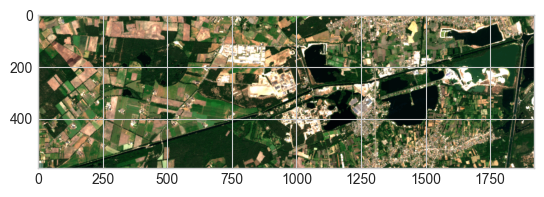

In [43]:
#WMS Test
#reference https://gis.stackexchange.com/questions/294056/reading-a-wms-raster-map-with-rasterio
from owslib.wms import WebMapService
from rasterio import MemoryFile
from rasterio.plot import show

wms_url = 'https://services.terrascope.be/wms/v2?'

wms = WebMapService(wms_url)

request = wms.getmap(
    layers=['CGS_S2_RADIOMETRY'],
    srs='EPSG:3857',
    format='image/png',
    bbox=(556945.9710290054,6657998.9149440415,575290.8578174476,6663655.255037144),
    size=(1920,592),
    time='2020-06-01'
)

with MemoryFile(request) as memfile:
     with memfile.open() as dataset:
            show(dataset)

## 國土測繪中心-WMTS 

In [5]:
#使用國土測繪中心 WMTS
%matplotlib notebook
from owslib.wmts import WebMapTileService
from rasterio import MemoryFile
from rasterio.plot import show
#from tests.utils import scratch_file

import math

def point_to_tileidx(layer,point,idx): # LUIMAP04,[13459775,2735805]
    #layer="LUIMAP04"
    #point=[13459775,2735805] # LUIMAP04 test pass
    #point=[13431672,2759671] #EMAP 15/14127/27366
    #point=[13470284,2850017] #EMAP test pass
    #target=[27366,14127]
    zoom=[[0,559082264.0287178,156543.0339280410],[1,279541132.0143589,78271.51696402048],[2,139770566.0071794,39135.75848201023],\
          [3,69885283.00358972,19567.87924100512],[4,34942641.50179486,9783.939620502561],[5,17471320.75089743,4891.969810251280],\
          [6,8735660.375448715,2445.984905125640],[7,4367830.187724357,1222.992452562820],[8,2183915.093862179,611.4962262814100],\
          [9,1091957.546931089,305.7481131407048],[10,545978.7734655447,152.8740565703525],[11,272989.3867327723,76.43702828517624],\
          [12,136494.6933663862,38.21851414258813],[13,68247.34668319309,19.10925707129406],[14,34123.67334159654,9.554628535647032],\
          [15,17061.83667079827,4.777314267823516],[16,8530.918335399136,2.388657133911758],[17,4265.459167699568,1.194328566955879],\
          [18,2132.729583849784,0.5971642834779395]]
    #idx=13
    print("point setup:%s" %(point))
    scale=zoom[idx][2]*256
    print("scale=%f" %(scale))
    offset=math.pow(2,zoom[idx][0]-1)
    print("offset=%i"%(offset))
    #target_0 = [target[0]-offset,target[1]-offset]
    #print(target_0)
    tile_idx = [(point[0]/scale)+offset,-(point[1]/scale)+offset]
    print("tile_idx=%s" %(tile_idx))
    url_t="https://wmts.nlsc.gov.tw/wmts/%s/default/GoogleMapsCompatible/" %(layer)
    [z,y,x] = [zoom[idx][0],int(tile_idx[1]),int(tile_idx[0])]
    print("url=%s%s/%s/%s" %(url_t,z,y,x))    
    return [z,y,x]

wms_url = 'https://wmts.nlsc.gov.tw/wmts'

wmts = WebMapTileService(wms_url)
#contextualWMSLegend=0&crs=EPSG:3857&dpiMode=7&featureCount=10&format=image/png&layers=LUIMAP04&styles=default&tileMatrixSet=GoogleMapsCompatible&url=https://wmts.nlsc.gov.tw/wmts

print("layers=%s" %(list(wmts.contents)))
layer="LUIMAP04"
point=[13469984,2853339]
idx=13
[z,y,x]=point_to_tileidx(layer,point,idx)
tile = wmts.gettile(layer='LUIMAP04', tilematrixset='GoogleMapsCompatible', tilematrix='%i' %(z), row=y, column=x, format="image/png")
#https://wmts.nlsc.gov.tw/wmts/LUIMAP04/default/GoogleMapsCompatible/15/14050/27397
if 0:
    out = open("output/%s.png" %(layer), 'wb')
    bytes_written = out.write(tile.read())
    out.close()

if 0:
    with MemoryFile(tile) as memfile:
         with memfile.open() as dataset:
              show(dataset)
if 0:
    import io          
    from PIL import Image
    memfile=MemoryFile(tile)
    image = memfile.read()
    im = Image.open(io.BytesIO(image))
    #im.show()
    display(im)
    #array = np.array(im)

layers=['AED', 'B100000', 'B25000', 'B50000', 'B5000', 'CITY', 'ConvenienceStore', 'EMAP01', 'EMAP12', 'EMAP15', 'EMAP16', 'EMAP2', 'EMAP5_OPENDATA', 'EMAP5', 'EMAP6_OPENDATA', 'EMAP6', 'EMAP7', 'EMAP8', 'EMAP96', 'EMAP97', 'EMAP98', 'EMAP9', 'EMAPX99', 'EMAP', 'GeoSensitive2', 'GeoSensitive', 'LANDSECT2', 'LANDSECT', 'LAND_OPENDATA', 'LUIMAP01', 'LUIMAP02', 'LUIMAP03', 'LUIMAP04', 'LUIMAP05', 'LUIMAP06', 'LUIMAP07', 'LUIMAP08', 'LUIMAP09', 'LUIMAP100', 'LUIMAP101', 'LUIMAP102', 'LUIMAP103', 'LUIMAP104', 'LUIMAP105', 'LUIMAP106', 'LUIMAP107', 'LUIMAP108', 'LUIMAP109', 'LUIMAP110', 'LUIMAP82', 'LUIMAP95', 'LUIMAP98', 'LUIMAP99', 'LUIMAP', 'LandOffice', 'MB5000', 'MOI_ASPECT', 'MOI_CONTOUR_2', 'MOI_CONTOUR', 'MOI_HILLSHADE', 'MOI_SHADERMAP', 'MOI_SLOPEP_GT30_2', 'MOI_SLOPEP_GT30', 'MOI_SLOPEP_LV7_2', 'MOI_SLOPEP_LV7', 'PHOTO2', 'PHOTO_MIX', 'ROAD', 'SCHOOL', 'SHELTERS', 'SoilLiquefaction2', 'SoilLiquefaction', 'TOPO05KPHOTO_104', 'TOPO05KPHOTO_105', 'TOPO05KPHOTO_106', 'TOPO05KPHOTO_107'

## PIL Test

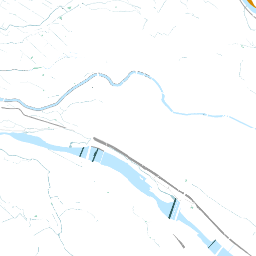

In [75]:
%matplotlib notebook
import numpy as np
from PIL import Image, ImageFilter
def gen_rgbs():
    df= pd.read_csv("include/色碼.csv")
    #df=df[df['年份']==109]
    rgbs = {}
    for index, row in df.iterrows():
        if (row['年份']==105 and row['類別代碼']<=10000 ) or (row['年份']==109) and row['類別代碼']>=100:
            rgb = (row['R'],row['G'],row['B'])
            rgb_str = "[%03i %03i %03i]" %(rgb[0],rgb[1],rgb[2])
            #rgb_str = str(rgb)
            rgbs[rgb_str]=row['類別中文名稱']
    return rgbs
#array.shape
if 0: #土法分析像素
    im = Image.open("output/LUIMAP04.png")
    array = np.array(im)
    rgbs=gen_rgbs()
    vd={}
    for x in range(256):
        for y in range(256):
            value=array[x][y]
            #value_str = str(value[0:3])
            value_str = "[%03i %03i %03i]" %(value[0],value[1],value[2])
            if value_str in vd:
                vd[value_str]+=1
            else:
                vd[value_str]=1
    key_sort=sorted(vd.keys())
    for key in key_sort:
        #print(key)
        if key in rgbs:
            kin=1
            kname=rgbs[key]
        else:
            kin=0
            kname=''
        print("%i,%s,%s,%s" %(kin,kname,key,vd[key]))
        
# 
if 0: #轉換
    im = Image.open("output/LUIMAP04.png")
    #display(im.rotate(45))
    #im_new = im.filter(filter=ImageFilter.FIND_EDGES)
    #im_new=im.convert('L') #1,L,P, RGB
    #im_new.save("output/testcase2.png")
    im_new = im
    display(im_new)

if 0:
    def point_hdl(data):
        print(data)
        if data>100:
            return 180
        else:
            return 0

    im = Image.open("output/testcase.png")
    im_new=im.convert('L')
    # using point function 
    threshold = 100  
    #im_new = im_new.point(lambda p:p >threshold and 200) 
    im_new = im_new.point(point_hdl) 

if 0:#某一點是否為某個值
    im = Image.open("output/testcase.png")
    h=w=256
    for x in range(w):
        for y in range(h):
            pix = im.getpixel((x,y))
            print("[%i,%i]=%s" %(x,y,pix))
        #img.putpixel((x,y), colors[pix[0]])
if 0:#將某個色碼圖層輸出,#將某個範圍或是某幾個色碼輸出
    filename_src="output/LUIMAP04.png"
    filename_dest="output/LUIMAP04_2.png"
    
    im = Image.open(filename_src)
    im1 = Image.Image.getdata(im)  
    #p=(70,212,206)
    p=(190,232,255)
    ps=[(190,232,255),(156,156,156)]
    im2=[]
    mode=2  #1: 單色碼，2: 多色碼, 3: 色碼有定義
    rgbs=gen_rgbs()
    for x in range(256):
        for y in range(256):
            data=im1[x*256+y]   
            if mode==1:
                if data[0:3]==p:
                    #n = (255,255,255,255)
                    n = data
                else:
                    n =(0,0,0,0)
            elif mode==3:
                value_str = "[%03i %03i %03i]" %(data[0],data[1],data[2])
                if value_str in rgbs:
                    n = data
                    #n = (255,255,255,255)
                else:
                    n =(0,0,0,0)
            else:
                n = (0,0,0,0)
                for p in ps:
                    if data[0:3]==p:
                        #n = (255,255,255,255)
                        n = data
                        break
                    
            im2.append(n)
    im_new = Image.new("RGBA",(256,256))
    im_new.putdata(im2)
    im_new.save(filename_dest)
    #im_new = Image.Image.putdata(im2)

#display(im_new)

# 水保局-歷史影像平台API
API位址: https://photo.swcb.gov.tw/api/Media

In [17]:
url="https://photo.swcb.gov.tw/api/Media?page=0"
filename="output/swcb_media.json"
url_get(filename, url,True)
data = load_json(filename)
df=pd.DataFrame.from_dict(data)
df


""


# pandasql 使用

In [ ]:
#sql="select * from df where County='新北市'"
sql="select distinct County from df"
df1=sqldf(df,sql)
df1

# 農委會API平台
"url": "http://www.coa.gov.tw"



# disfactory API
農地工廠網站： https://disfactory.tw/

API 資訊： https://api.disfactory.tw/redoc/

In [5]:
act_id=0 #0: df, 1: print data
if 1:#得到中心座標往外指定範圍的已有工廠資料
    url="http://api.disfactory.tw/api/factories?lng=121.07391&lat=24.77480&range=5"
    filename="output/disfactory_factories.json"
if 0: #取得指定 id 的工廠資料
    url="http://api.disfactory.tw/api/factories/21e01cff-ba49-4750-8249-ee8e69d8e625"
    filename="output/disfactory_factory1.json"
    act_id=1
if 0:#取得指定 id 工廠的 Report
    factory_id="21e01cff-ba49-4750-8249-ee8e69d8e625"
    url="http://api.disfactory.tw/api/factories/%s/report_records" %(factory_id)
    print(url)
    filename="output/disfactory_factory1_report.json"
    act_id=1
if 0:#使用地段號取得工廠資料
    sectcode="0648"
    landcode="04740000"
    url="http://api.disfactory.tw/api/sectcode?sectcode=%s&landcode=%s" %(sectcode,landcode)
    print(url)
    filename="output/disfactory_sectcode.json"
    act_id=1 
if 0:#取得某個地區的工廠數量
    townname='新竹市'
    url="http://api.disfactory.tw/api/statistics/factories?townname=%s" %(townname)
    print(url)
    filename="output/disfactory_statistics.json"
if 0: #取得某個地區的照片的數量
    townname='新竹市'
    url="http://api.disfactory.tw/api/statistics/images?townname=%s" %(townname)
    filename="output/disfactory_images.json"
    act_id=1
if 0: #取得某個地區的回報紀錄數量
    townname='新竹縣'
    url="http://api.disfactory.tw/api/statistics/report_records?townname=%s" %(townname)
    filename="output/disfactory_report_records.json"
    act_id=1  
if 0: #統計全台灣各縣市的工廠情況, 處理進度與回報情況
    url="http://api.disfactory.tw/api/statistics/total"
    filename="output/disfactory_statistics_total.json"
if 0: # image 存取範例 https://api.disfactory.tw/api/factories?lng=121.4441971&lat=24.9661224&range=1
    pass
url_get(filename, url,True)
data = load_json(filename)
if act_id==0:
    df=pd.DataFrame.from_dict(data)
else:
    print(data)
df

,id,display_number,lat,lng,name,landcode,townname,sectname,sectcode,source,factory_type,type,cet_report_status,before_release,images,reported_at,data_complete,status,document_display_status
0,da4cdc20-5d16-434b-8650-1a73485b7252,44271,24.775357,121.072243,既有違章工廠 No.44274,04740000,新竹縣芎林鄉上山村,富林段,0648,G,None,None,A,True,[],None,False,A,None
1,bb86e900-353b-404f-b64e-8715a01fb9b4,43477,24.792491,121.029103,既有違章工廠 No.43480,04080000,新竹縣竹東鎮員山里,下員段,0709,G,None,None,A,True,[],None,False,A,None
2,83f7d37c-5535-4a6d-95b3-ab8d7937f488,43676,24.788907,121.041591,既有違章工廠 No.43679,05090000,新竹縣竹東鎮員山里,中員段,0710,G,None,None,A,True,[],None,False,A,None
3,215abdde-2233-479b-aee4-e4ae4be9b31f,43678,24.781835,121.040711,既有違章工廠 No.43681,10080001,新竹縣竹東鎮頭重里,下員段,0709,G,None,None,A,True,[],None,False,A,None
4,0372c4e7-1cf8-4698-9de3-fdb53aae6c8d,43679,24.781543,121.040711,既有違章工廠 No.43682,01850000,新竹縣竹東鎮頭重里,富貴段,0635,G,None,None,A,True,[],None,False,A,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,eabd5b40-17b0-4310-b8f1-fd58352341b8,44717,24.754285,121.094109,既有違章工廠 No.44720,10970004,新竹縣芎林鄉文林村,竹林段,0653,G,None,None,A,True,[],None,False,A,None
96,675a362c-bc10-4005-afd7-c92c37d6610c,44719,24.756516,121.095504,既有違章工廠 No.44722,00800000,新竹縣芎林鄉石潭村,竹林段,0653,G,None,None,A,True,[],None,False,A,None
97,39b048f5-3d7d-4ebe-8285-82e1a975f154,44720,24.756711,121.096233,既有違章工廠 No.44723,00670000,新竹縣芎林鄉石潭村,竹林段,0653,G,None,None,A,True,[],None,False,A,None
98,c97936ea-b1cc-469e-89af-322e905ff073,44874,24.753018,121.097134,既有違章工廠 No.44877,01660000,新竹縣芎林鄉石潭村,竹林段,0653,G,None,None,A,True,[],None,False,A,None


# Flow features

In [46]:
#load
import codes.wflow as wflow

wfs = wflow.WFlows()
wfs.desc()
flow_id='C1300QE-202107251400'
wfs.load(flow_id)
wf=wfs.ncs[flow_id]
#nc_file="/Users/wuulong/MakerBk2/QGIS/projects/Test_316/202107251400.nc"
#wf=wflow.WFlow(nc_file)
#觀察
#wf.rootgrp
#wf.time
#wf.x
#wf.time[:]
#wf.time_d[:]

{'flow_id': 'C1300QE-202107251400', 'nc_file': '/Users/wuulong/MakerBk2/QGIS/projects/hackathon/流量/C1300QE-202107251400.nc'}


In [69]:
import csv
def list_to_csv(filename,header,lst):
    #filename = "output/notebook_flow.csv"
    with open(filename, 'w', newline='') as flow_file:
        writer = csv.writer(flow_file)
        writer.writerow(header)
        for ret1 in ret:
            x.append(ret1[0])
            y.append(ret1[3])
            writer.writerow([ret1[0],ret1[3]])
    print("%s saved" %(filename))
    
if 0:
    ret = wf.get_flow("time_xy",[27114180,120.9339, 24.4961,10],False)
    print(ret)
if 1:
    ret=wf.get_flow("his_xy",[121.209288,24.673251,10],False)
    #print(ret)
    list_to_csv("output/notebook_flow.csv",["time", "flow"],ret)
    
if 0:
    ret = wf.get_flow("max_offset",[120.9339,24.4961,5],False)
    print(ret)
if 0:
    ret = wf.get_flow_bylist("time_xy",[[27114180,120.9339, 24.4961],[27114180,120.9339, 24.4961]],False)
    print(ret)
    ret=wf.get_flow_bylist("his_xy",[[120.9339,24.4961],[120.9339,24.4961]],False)
    print(ret)
    ret = wf.get_flow_bylist("max_offset",[[120.9339,24.4961,5],[120.9339,24.4961,5]],False)
    print(ret)
if 0: #plot test
    %matplotlib notebook
    import matplotlib.pyplot as plt
    rets=wf.get_flow("his_x_y",[120.9339,24.4961],False)
    print(rets)
    xs=[]
    ys=[]
    for ret in rets:
        xs.append(ret[0])
        ys.append(ret[3])
    plt.plot(xs,ys)    
if 0: # DB 找點取得最大流量
    #上坪            | SRID=4326;POINT(121.11429980328 24.6690392406984)
    sql="select name,ST_AsEWKT(ST_Transform(geom, 4326)) as wkt_4326 from sensor_station where type='河川流量測站'"
    df = sql_to_df(conn,sql) 
    for index, row in df.iterrows():
        wkt_4326 = row['wkt_4326']
        strs = wkt_4326.replace("("," ").replace(")"," ").split()
        lon=float(strs[1])
        lat=float(strs[2])
        ret = wf.get_flow("max_offset",[lon,lat,10],False)
        if ret>0:
            print("name=%s,flow=%f" %(row['name'],ret))
if 0:# time list
    print("index,time,local_time")
    for i in range(len(wf.time)):
        local = wflow.nc_to_localtime(wf.time_d[i])
        time_str=wf.time[i]
        local_str=local.strftime("%Y%m%dT%H%M%S")
        line = "%i,%s,%s" %(i,time_str,local_str)
        print(line)
        
if 0:#get_flow by local time , 1,27114180.0,20210721T150000
    fmt="%Y%m%dT%H%M%S"
    localtime = datetime.strptime("20210721T150000", fmt)
    print(wflow.localtime_to_nc(localtime))

output/notebook_flow.csv saved


In [54]:
ret[0]

['20210721T140000', 24.4961, 120.9339, 0.0]

In [4]:
#DB產生點位列表，提供給 flow_query.csv
if 0: #'河川流量測站'
    sql="select name,ST_AsEWKT(ST_Transform(geom, 4326)) as wkt_4326 from sensor_station where type='河川流量測站'"
    catagory = '河川流量測站'
if 0: #環保署水質測站
    sql="select sitename as name,ST_AsEWKT(ST_Transform(geom, 4326)) as wkt_4326 from e_river_station"
    catagory = '環保署水質測站'
if 1: #取水口
    sql="select name,ST_AsEWKT(geom) as wkt_4326 from s_waterin_b"
    catagory = '取水口'

df = sql_to_df(conn,sql) 
for index, row in df.iterrows():
    wkt_4326 = row['wkt_4326']
    strs = wkt_4326.replace("("," ").replace(")"," ").split()
    lon=float(strs[1])
    lat=float(strs[2])
    print("%s\t%s\t%f\t%f" %(catagory,row['name'],lon,lat))


取水口	頭前溪	247789.718500	2746405.949900
取水口	頭前溪(隆恩堰）	253510.196900	2743350.831300
取水口	寶一、寶二水庫	253694.601700	2738538.943000
取水口	竹東圳	260198.553600	2734122.677200
取水口	頭前溪(竹林橋)	259519.554800	2737965.399100
取水口	油羅溪	268521.760300	2732930.993500
取水口	地面水(山澗水流入油羅溪)2	276718.017500	2737526.548100
取水口	地面水(山澗水流入油羅溪)1	270208.324700	2729214.808100
取水口	白蘭溪	261086.650900	2722005.870800


In [25]:
#用河川級距的線段端點查流量
fd = FlwDir()
fd.reload()
fd.init()
fd.streams(9,'')
fd.G.nodes

for node in fd.G.nodes.keys():
    name = fd.G.nodes[node]['name']
    wkt = fd.G.nodes[node]['Wkt']
    strs = wkt.replace("("," ").replace(")"," ").split()
    x=float(strs[1])
    y=float(strs[2])
    lonlat=to_crs([x, y], 3826,4326)
    #print("name=%s, wkt=%s,lon=%f,lat=%f"%(name,wkt,lonlat[0],lonlat[1]))
    print("%s\t%s\t%f\t%f"%('河川級距',name,lonlat[0],lonlat[1]))

data/catchment/C1300_20m_elv0.tif info:<open DatasetReader name='data/catchment/C1300_20m_elv0.tif' mode='r'>
data/catchment/C1300_20m_LDD.tif info:<open DatasetReader name='data/catchment/C1300_20m_LDD.tif' mode='r'>
{'ftype': 'ldd',
 'idxs_ds': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 'idxs_pit': array([ 540653, 1909678, 2635460, 3276180, 4662033, 4779528], dtype=int32),
 'idxs_seq': None,
 'latlon': False,
 'ncells': 2199615,
 'shape': (2197, 2180),
 'transform': Affine(20.00229477064219, 0.0, 239707.5006,
       0.0, -20.00229476558928, 2751895.7128)}
stream saved filename=output/river_c1300_stream_9.geojson
河川級距	S0	121.058231	24.543355
河川級距	E0	120.931109	24.851988
河川級距	S1	121.155575	24.549426
河川級距	E1	121.114947	24.599669
河川級距	S2	121.141218	24.600550
河川級距	E3	121.108739	24.729883
河川級距	S4	121.249618	24.679149
河川級距	E4	121.219792	24.689850
河川級距	S5	121.246562	24.733151
河川級距	E5	121.204203	24.705945
河川級距	S6	121.209288	24.673251
河川級距	S9	121.158960	24.728394
河川級距	E9	121.090166	24

# 新竹縣開放資料 API

In [11]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
if 1: #新竹縣列管珍貴老樹資料
    api_id="oldtreelist"
    url="https://www.hsinchu.gov.tw/Mget/RestfulAPI/oldtreelist"
    filename="output/hsinchu_county_%s.json" %(api_id)

#r = requests.get(url, headers=headers, params = {})  
r = requests.get(url, params = {})  
open(filename, 'wb').write(r.content)
data = load_json(filename)
df=pd.DataFrame.from_dict(data)
df

,SN,Type,TreeYears,TreeHight,ChestCircumference,BreastDiameter,CrownWidth,Place,LandOwnership,Coordinate_X,Coordinate_Y
0,1,榕樹,250,8.98,7.63,2.22,221.2,竹北市隘口里福昌宮旁,公,253635,2744148
1,2,茄苳樹,116,8.35,3.62,0.65,36,竹北市新社里40號新社國小,校,249799,2748348
2,3,榕樹,250,6.7,7,2.28,87.3,竹北市中興里守望相助隊旁,公,253529,2744854
3,4,樟樹,150,11.97,3.49,1,399.6,關西鎮北山里10鄰3號,私,266598,2744128
4,5,茄苳樹,200,13.67,5.93,1.58,339.6,關西鎮大同里7鄰49號,私,265353,2744494
5,6,樟樹,200,11.6,3.35,0.94,109.2,關西鎮大同里10鄰50號,私,265143,2744518
6,7,楓香樹,180,22,3.95,0.96,594,關西鎮大同里8鄰55號,私,264823,2744220
7,8,楓香樹,180,20.4,3.74,0.96,374,關西鎮大同里8鄰55號,私,264812,2744206
8,9,楓香樹,180,20.4,3.14,0.78,314,關西鎮大同里8鄰55號,私,264812,2744210
9,10,樟樹,300,14.96,4.24,1.08,147.6,關西鎮東平里13鄰37號,私,263686,2746052


# 思源地圖 API 使用

In [12]:
#單個 API 的基本測試與使用

def sourcingwater_ask(**kwargs):
    #kind=流域&transfer=所有河道&nodeID=1300&nodeName=頭前溪&sto=8
    keypars=""
    for key in kwargs:
        keypar = "&%s=%s" %(key,kwargs[key])
        keypars = "%s%s" %(keypars,keypar) 
    return keypars

def sourcingwater_asks(asks):
    fmt = "geojson"
    seq = 0
    for ask in asks:
        title = ask['title']
        del ask['title']
        keypars=sourcingwater_ask(**ask)

        api_id="findNodeByTransfer"
        url="https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=%s%s" %(fmt,keypars)
        filename="output/sourcingwater_%s_%i.%s" %(title,seq,fmt) 
        seq +=1

        print("url=%s" %(url))
        r = requests.get(url, params = {})  
        open(filename, 'wb').write(r.content)
        print("%s saved" %(filename))
        data = load_json(filename)
        if fmt=="json":
            print(data)
#headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}


fmt = "geojson" #json
single = True
if 0: # 取得所有流域範圍
    api_id="basin"
    url="https://sourcingwater.lass-net.org/layer/basin?format=%s" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 取得山河事件簿雨量站
    api_id="rainStation"
    url="https://sourcingwater.lass-net.org/layer/rainStation?format=%s" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 取得山河事件簿淹水測站
    api_id="floodStation"
    url="https://sourcingwater.lass-net.org/layer/floodStation?format=%s" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 取得群眾標註資料
    api_id="commutag"
    url="https://sourcingwater.lass-net.org/layer/commutag?format=%s&dataset=5f10405f9da4ecbaf3d62386" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 列出所有思源地圖可用的群眾標註資料集
    fmt = "json"
    api_id="list-commutag-dataset"
    url="https://sourcingwater.lass-net.org/layer/list-commutag-dataset"
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 列出所有思源地圖類別
    api_id="kind"
    fmt="json"
    url="https://sourcingwater.lass-net.org/logicTopo/kind"
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 用思源地圖類別和id找出對應的拓樸節點
    api_id="findNodeByKind"
    url="https://sourcingwater.lass-net.org/logicTopo/findNodeByKind?format=%s&kind=流域&nodeID=1300" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 用思源地圖類別、思源地圖類別問題、和id找出對應的拓樸節點
    api_id="findNodeByTransfer"
    url="https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=%s&kind=流域&transfer=流域範圍&nodeID=1300" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
    
if 0: # 取得拓樸節點基本資料
    fmt = "json"
    api_id="getNodeInfo"
    url="https://sourcingwater.lass-net.org/logicTopo/getNodeInfo?kind=取水口&nodeID=隆恩堰&nodeName=隆恩堰"
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
### 特別有趣的問題與應用
if 0: # kind=流域&transfer=所有河道&nodeID=1300&nodeName=頭前溪&sto=8
    api_id="findNodeByTransfer"
    url="https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=%s&kind=流域&transfer=所有河道&nodeID=1300&nodeName=頭前溪&sto=8" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # kind=流域&transfer=流域分區&nodeID=1300&nodeName=頭前溪&sto=8
    api_id="findNodeByTransfer"
    url="https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=%s&kind=流域&transfer=流域分區&nodeID=1300&nodeName=頭前溪&sto=8" %(fmt)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)
if 0: # 用 function 問
    if 0: #所有河道 
        keypars = sourcingwater_ask(kind="流域",transfer="所有河道",nodeID="1300",nodeName="頭前溪",sto="8")
    if 0: #DrawShapeQuest - point
        #https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?kind=流域&transfer=生活區域&nodeID=1300&nodeName=頭前溪&shape={"ptArr":[[121.1035920208451,24.63048457626401]]}
        keypars = sourcingwater_ask(kind="流域",transfer="生活區域",nodeID="1300",nodeName="頭前溪",shape='{"ptArr":[[121.1035920208451,24.63048457626401]]}')
    if 1: #DrawShapeQuest - circle
        #https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?kind=鄰近污染源&transfer=工廠&nodeID=大隘村&shape={"center":[121.09042183819497,24.734831311737466],"radius":1000}
        keypars = sourcingwater_ask(kind="鄰近污染源",transfer="工廠",nodeID="大隘村",shape='{"center":[121.09042183819497,24.734831311737466],"radius":1000}')

    api_id="findNodeByTransfer"
    url="https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=%s%s" %(fmt,keypars)
    filename="output/sourcingwater_%s.%s" %(api_id,fmt)

if 0: #多題詢問的例子
    #title 變數暫時用來傳遞為檔案名稱
    single = False
    asks=[]
    asks.append({"title":"所有河道", "kind":"流域",'transfer':"所有河道",'nodeID':"1300",'nodeName':"頭前溪",'sto':"8"})
    asks.append({"title":"生活區域","kind":"流域",'transfer':"生活區域",'nodeID':"1300",'nodeName':"頭前溪",'shape':'{"ptArr":[[121.1035920208451,24.63048457626401]]}'})
    asks.append({"title":"鄰近污染源","kind":"鄰近污染源",'transfer':"工廠",'nodeID':"大隘村",'nodeName':"頭前溪",'shape':'{"center":[121.09042183819497,24.734831311737466],"radius":1000}'})

if 0: #問題從 json 設定檔來，include/asks_template.json 是範例，建議複製到 output/asks.json 來更改使用
    single = False
    filename = "output/asks.json"
    asks = load_json(filename)

if single:
    #r = requests.get(url, headers=headers, params = {})  
    print("url=%s" %(url))
    r = requests.get(url, params = {})  
    open(filename, 'wb').write(r.content)
    data = load_json(filename)
    if fmt=="json":
        print(data)
else:
    sourcingwater_asks(asks)
#df=pd.DataFrame.from_dict(data)
#df

url=https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=geojson&kind=流域&transfer=所有河道&nodeID=1300&nodeName=頭前溪&sto=8
output/sourcingwater_所有河道_0.geojson saved
url=https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=geojson&kind=流域&transfer=生活區域&nodeID=1300&nodeName=頭前溪&shape={"ptArr":[[121.1035920208451,24.63048457626401]]}
output/sourcingwater_生活區域_1.geojson saved
url=https://sourcingwater.lass-net.org/logicTopo/findNodeByTransfer?format=geojson&kind=鄰近污染源&transfer=工廠&nodeID=大隘村&nodeName=頭前溪&shape={"center":[121.09042183819497,24.734831311737466],"radius":1000}
output/sourcingwater_鄰近污染源_2.geojson saved
